In [1]:
import pandas as pd
import nltk
import math
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Asus Vivobook
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('korpus_abstrak.csv')
df.head()

Link  \
0  detail.jsp?id=46123&lokasi=lokal   
1  detail.jsp?id=46126&lokasi=lokal   
2  detail.jsp?id=46149&lokasi=lokal   
3  detail.jsp?id=46167&lokasi=lokal   
4  detail.jsp?id=45008&lokasi=lokal   

                                             Abstrak  \
0  Analisis Faktor yang Memengaruhi Loyalitas Kon...   
1  Analisis Perilaku Pengguna Dalam Mencapai Kred...   
2  Desain Interaksi Aplikasi untuk Mengakomodasi ...   
3  Evaluasi dan Pengembangan Alternatif Desain In...   
4  Evaluasi Desain Materi Instruksional Berdasark...   

                       Author  \
0              Sumarliyanti     
1  S. Reyneta Carissa Anwar     
2          Mila  Alief Alya     
3               Ivana Putri     
4          Aulia Chairunisa     

                                                 Pub                    Ed  
0   Publisher: Depok: Fakultas Ilmu Komputer UI, ...   Putu Wuri Handayani  
1   Publisher: Depok: Fakultas Ilmu Komputer Univ...   Putu Wuri Handayani  
2   Publisher: Depok": Fakultas Ilmu Komputer Uni...  Harry Budi Santoso S  
3   Publisher: Depok: Fakultas Ilmu Komputer Univ...    Harry Budi Santoso  
4   Publisher: Depok: Fakultas Ilmu Komputer UI, ...    Harri Budi Santoso

# A - Preprocessing

### 1. Lakukan lowercasing dan tokenisasi. Lowercasing dilakukan dengan fungsi lower() dan tokenisasi dilakukan dengan word_tokenize dari NLTK. Tampilkan 10 abstrak teratas!


In [3]:
abstrak_list = []

for i in df["Abstrak"]:
    abstrak_list.append(i.lower())

In [4]:
# tokenization
abstrak_token = {}
index = 0
for i in abstrak_list:
    word_tokens = nltk.word_tokenize(i)
    abstrak_token[index] = word_tokens
    index += 1

for i in range (10):
    print(i, ":", abstrak_token[i], "\n")

0 : ['analisis', 'faktor', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'membeli', 'makanan', 'pada', 'layanan', 'online', 'delivery-sourcing', ':', 'studi', 'kasus', 'go-food', 'penelitian', 'ini', 'dilakukan', 'untuk', 'menganalisis', 'faktor-faktor', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'pembelian', 'makanan', 'pada', 'online', 'delivery-sourcing', 'di', 'indonesia', ',', 'yaitu', 'go-food', '.', 'faktor-faktor', 'yang', 'digunakan', 'dalam', 'model', 'penelitian', 'yang', 'diajukan', 'berasal', 'dari', 'tiga', 'teori', ',', 'yaitu', 'teori', 'kualitas', 'hubungan', ',', 'model', 'perceived', 'value', '(', 'perval', ')', ',', 'dan', 'mobile', 'service', 'quality', '(', 'm-s-qual', ')', '.', 'total', 'responden', 'yang', 'berhasil', 'diperoleh', 'adalah', 'sebanyak', '852', 'data', 'lengkap', '.', 'data', 'tersebut', 'dianalisis', 'menggunakan', 'pendekatan', 'kuantitatif', 'dengan', 'metode', 'covariance-based', 'structural', 'equation', 'model', '(',

### 2. Lakukan penghapusan semua karakter selain alfanumerik menggunakan fungsi isalnum(). Tampilkan 10 abstrak teratas!

In [5]:
token_abstract_clean={}
for i in abstrak_token:
  token_abstract_clean[i]=[]
  for token in abstrak_token[i]:
    if token.isalnum():
      token_abstract_clean[i].append(token)


for i in range(10):
    print(i, ":", token_abstract_clean[i], "\n")

0 : ['analisis', 'faktor', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'membeli', 'makanan', 'pada', 'layanan', 'online', 'studi', 'kasus', 'penelitian', 'ini', 'dilakukan', 'untuk', 'menganalisis', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'pembelian', 'makanan', 'pada', 'online', 'di', 'indonesia', 'yaitu', 'yang', 'digunakan', 'dalam', 'model', 'penelitian', 'yang', 'diajukan', 'berasal', 'dari', 'tiga', 'teori', 'yaitu', 'teori', 'kualitas', 'hubungan', 'model', 'perceived', 'value', 'perval', 'dan', 'mobile', 'service', 'quality', 'total', 'responden', 'yang', 'berhasil', 'diperoleh', 'adalah', 'sebanyak', '852', 'data', 'lengkap', 'data', 'tersebut', 'dianalisis', 'menggunakan', 'pendekatan', 'kuantitatif', 'dengan', 'metode', 'structural', 'equation', 'model', 'yang', 'didukung', 'oleh', 'tools', 'amos', 'hasil', 'analisis', 'yang', 'diperoleh', 'adalah', 'faktor', 'emotional', 'value', 'social', 'value', 'dan', 'price', 'value', 'for', 'money', 'meme

# B - BM-25 

### 1. Untuk setiap abstrak yang telah di-preprocessing, buatlah dictionary dengan key berupa token dan value berupa term frequency. Anda diperkenankan menggunakan library collections, namun Anda tidak wajib menggunakan library ini. Tampilkan dictionary untuk masing-masing dari 10 abstrak teratas.

In [6]:
list_of_term_freq_abstract = []
for i in token_abstract_clean:
  new_dict = {}
  list_of_term_freq_abstract.append(new_dict)
  for token in token_abstract_clean[i]:
    if token not in list(new_dict):
      new_dict[token] = 1
    else:
      new_dict[token] += 1


for i in range (10):
    print(i, ":", list_of_term_freq_abstract[i], "\n")

0 : {'analisis': 2, 'faktor': 5, 'yang': 10, 'memengaruhi': 5, 'loyalitas': 2, 'konsumen': 2, 'dalam': 3, 'membeli': 1, 'makanan': 2, 'pada': 2, 'layanan': 1, 'online': 2, 'studi': 1, 'kasus': 1, 'penelitian': 2, 'ini': 1, 'dilakukan': 1, 'untuk': 1, 'menganalisis': 1, 'pembelian': 1, 'di': 4, 'indonesia': 1, 'yaitu': 2, 'digunakan': 1, 'model': 3, 'diajukan': 1, 'berasal': 1, 'dari': 1, 'tiga': 1, 'teori': 2, 'kualitas': 1, 'hubungan': 1, 'perceived': 3, 'value': 7, 'perval': 1, 'dan': 4, 'mobile': 1, 'service': 1, 'quality': 1, 'total': 1, 'responden': 1, 'berhasil': 1, 'diperoleh': 2, 'adalah': 2, 'sebanyak': 1, '852': 1, 'data': 2, 'lengkap': 1, 'tersebut': 1, 'dianalisis': 1, 'menggunakan': 1, 'pendekatan': 1, 'kuantitatif': 1, 'dengan': 1, 'metode': 1, 'structural': 1, 'equation': 1, 'didukung': 1, 'oleh': 1, 'tools': 1, 'amos': 1, 'hasil': 1, 'emotional': 2, 'social': 1, 'price': 1, 'for': 1, 'money': 1, 'secara': 3, 'positif': 3, 'terhadap': 3, 'mana': 3, 'paling': 3, 'kuat': 3

### 2. Buatlah daftar vocabulary (token yang unik) dari seluruh abstrak dan hitung document frequency serta inverse document frequency (idf) untuk setiap vocabulary. Untuk perhitungan idf, gunakan rumus berikut:

In [7]:
df2 =  pd.DataFrame(list_of_term_freq_abstract)
df_vocabulary =df2.transpose()
df_vocabulary.fillna(value=0, inplace=True)
df_vocabulary

0    1    2    3    4    5    6    7    8    9    ...  459  \
analisis       2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0   
faktor         5.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  7.0  ...  0.0   
yang          10.0  3.0  2.0  6.0  8.0  2.0  6.0  8.0  7.0  7.0  ...  6.0   
memengaruhi    5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  ...  0.0   
loyalitas      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
interasksi     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
adlah          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
dimanipulasi   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
cotrol         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
conferencing   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

              460  461  462  463  464   465   466   467  468  
analisis      1.0  0.0  0.0  1.0  1.0   0.0   0.0   0.0  0.0  
faktor        1.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  
yang          5.0  2.0  3.0  3.0  4.0  10.0  16.0  15.0  7.0  
memengaruhi   3.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  
loyalitas     0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  
...           ...  ...  ...  ...  ...   ...   ...   ...  ...  
interasksi    0.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0  0.0  
adlah         0.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0  0.0  
dimanipulasi  0.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0  0.0  
cotrol        0.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0  0.0  
conferencing  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  1.0  

[7185 rows x 469 columns]

#### Menghitung document frequency

In [8]:
df_freq = {}
for i, row in df_vocabulary.iterrows():
  df_freq[i] = 0
  for token in row:
    if token > 0.0:
      df_freq[i] += 1

df_vocabulary['df'] = df_freq.values()
df_vocabulary['df']

analisis         96
faktor           71
yang            466
memengaruhi      41
loyalitas         4
               ... 
interasksi        1
adlah             1
dimanipulasi      1
cotrol            1
conferencing      1
Name: df, Length: 7185, dtype: int32

#### Perhitungan Idf

In [9]:
total_word = len(list_of_term_freq_abstract)

df_vocabulary['idf'] = df_vocabulary['df'].apply(lambda x: math.log(1+(total_word-x+0.5)/(x+0.5)))
df_vocabulary['idf']

analisis        1.583190
faktor          1.883035
yang            0.007475
memengaruhi     2.427039
loyalitas       4.648655
                  ...   
interasksi      5.747268
adlah           5.747268
dimanipulasi    5.747268
cotrol          5.747268
conferencing    5.747268
Name: idf, Length: 7185, dtype: float64

#### 3.  Carilah document length (dl) dari setiap abstrak dan average document length (adl) dari keseluruhan abstrak. Tampilkan nilai dl dari 10 abstrak teratas.

In [10]:
doc_length={}
for i in token_abstract_clean:
  doc_length[i] = len(token_abstract_clean[i])

for i in range(10):
    print(i, ":", doc_length[i], "\n")


av_doc_legth = sum(doc_length.values())/len(doc_length)

0 : 148 

1 : 105 

2 : 124 

3 : 138 

4 : 126 

5 : 108 

6 : 185 

7 : 135 

8 : 151 

9 : 278 



#### 4. Buatlah fungsi score(query, doc, k, b) yang memberi output nilai skor relevansi antara query dengan masing-masing abstrak (doc). S

In [11]:
def score(query, doc, k, b):
    query_token = nltk.word_tokenize(query)
    score = 0
    for i in query_token: 
        if i in df_freq.keys():
            tf_term_doc = df_vocabulary.loc[i,doc]
            idf_term = df_vocabulary.loc[i,'idf']
        else:
            tf_term_doc = 0
            idf_term = 0
        score += (tf_term_doc/(tf_term_doc+k*((1-b)+b*(doc_length[doc]/av_doc_legth))))*idf_term
    return score

#### 5. Gunakan fungsi score yang telah Anda buat untuk mencari 10 abract. Tampilkan 10 tokenized abstrak dengan nilai relevansi tertinggi untuk masing-masing dari (a), (b), dan (c). 
<p>a. query: information retrieval, k=1.2, b=0.75</p>
<p>b. query: sistem manajemen pengetahuan, k=1.2, b=0.5</p>
<p>c. query: knowledge discovery, k=2, b=0.5</p>

##### Bagian a

In [12]:
#relevance score query a
rev_score_a={}
for i in token_abstract_clean:
    rev_score_a[i] = score('information retrieval', i, 1.2, 0.75)

sort_score_a = sorted(rev_score_a.items(), key=lambda x: x[1], reverse=True)
sort_score_a

[(397, 4.6408983688570755),
 (188, 3.192833299959496),
 (381, 3.1858577218936857),
 (50, 2.6267500652657305),
 (36, 2.5734609724640656),
 (131, 2.3678774385140677),
 (110, 2.247245200424264),
 (416, 2.0592183960295607),
 (143, 2.0121444382353206),
 (103, 1.9873658724053043),
 (19, 1.9830026582903555),
 (175, 1.8198607971773675),
 (43, 1.708127933628189),
 (414, 1.6598120724542893),
 (251, 1.5850630194171444),
 (39, 1.564933494016739),
 (137, 1.514912992686794),
 (65, 1.5074999567404566),
 (345, 1.4610291042334278),
 (58, 1.292466248870186),
 (73, 1.279051016670282),
 (80, 1.2659114120178794),
 (138, 1.2659114120178794),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0)

In [13]:
top_score_a = sort_score_a[:10]
for i in range(len(top_score_a)): 
    key = top_score_a[i][0]
    print(key, ':', token_abstract_clean[key])
    print('\n')

397 : ['perolehan', 'informasi', 'lintas', 'bahasa', 'menggunakan', 'korpus', 'paralel', 'dengan', 'metode', 'bilingual', 'mapping', 'perolehan', 'informasi', 'lintas', 'bahasa', 'atau', 'cross', 'language', 'information', 'retrieval', 'clir', 'merupakan', 'salah', 'satu', 'task', 'di', 'bidang', 'information', 'retrieval', 'untuk', 'melakukan', 'perolehan', 'informasi', 'dimana', 'ada', 'perbedaan', 'bahasa', 'antara', 'dokumen', 'dengan', 'query', 'yang', 'ingin', 'ditanyakan', 'salah', 'satu', 'metode', 'yang', 'dapat', 'digunakan', 'untuk', 'memecahkan', 'masalah', 'ini', 'adalah', 'dengan', 'menggunakan', 'language', 'model', 'bilingual', 'untuk', 'mencari', 'kemiripan', 'antara', 'query', 'dengan', 'yang', 'relevan', 'pada', 'penelitian', 'ini', 'sebuah', 'pendekatan', 'bernama', 'bilingual', 'mapping', 'akan', 'digunakan', 'untuk', 'membuat', 'language', 'model', 'bilingual', 'dan', 'menggunakannya', 'dalam', 'melakukan', 'clir', 'language', 'model', 'kedua', 'bahasa', 'diciptak

#### Bagian b

In [14]:
#relevance score query b
rev_score_b={}
for i in token_abstract_clean:
    rev_score_b[i] = score('sistem manajemen pengetahuan', i, 1.2, 0.5)

sort_score_b = sorted(rev_score_b.items(), key=lambda x: x[1], reverse=True)
sort_score_b

[(461, 3.610303430991813),
 (240, 3.2818642003197174),
 (453, 3.2486817607270457),
 (264, 3.122077814893121),
 (249, 3.0909969707052136),
 (418, 2.8594785137556293),
 (15, 2.807410685726007),
 (399, 2.806054112969162),
 (8, 2.5235585560437026),
 (43, 2.4639038341995807),
 (296, 2.3835077664661224),
 (456, 2.382209991128287),
 (392, 2.2790935013218427),
 (6, 2.107767680350487),
 (141, 1.8677606302453353),
 (376, 1.8628827480976284),
 (138, 1.8236896181369189),
 (361, 1.8146464380176524),
 (412, 1.794325355806408),
 (207, 1.5771446115259486),
 (71, 1.5555801754650807),
 (110, 1.5397899139519997),
 (319, 1.5268741847941931),
 (281, 1.5091519509031182),
 (278, 1.4869618384171261),
 (107, 1.4490829476022942),
 (99, 1.4196985402536433),
 (464, 1.4108954498485529),
 (417, 1.3462033290445201),
 (466, 1.215013865454448),
 (228, 0.807512618128036),
 (117, 0.8022223896902785),
 (410, 0.7934294326416738),
 (307, 0.7931648479300726),
 (386, 0.7897966955620678),
 (257, 0.7889401350695143),
 (229, 0.

In [15]:
top_score_b = sort_score_b[:10]
for i in range(len(top_score_b)): 
    key = top_score_b[i][0]
    print(key, ':', token_abstract_clean[key])
    print('\n')

461 : ['usability', 'evaluation', 'sistem', 'informasi', 'manajemen', 'rumah', 'sakit', 'studi', 'kasus', 'aplikasi', 'instalasi', 'gawat', 'darurat', 'rumah', 'sakit', 'umum', 'daerah', 'pasar', 'minggu', 'penggunaan', 'teknologi', 'informasi', 'telah', 'meluas', 'ke', 'rumah', 'sakit', 'tujuan', 'dari', 'sistem', 'informasi', 'manajemen', 'rumah', 'sakit', 'adalah', 'meningkatkan', 'kualitas', 'pelayanan', 'pasien', 'meningkatkan', 'efisiensi', 'dan', 'efektivitas', 'pekerja', 'penelitian', 'ini', 'bertujuan', 'untuk', 'mencari', 'masalah', 'usability', 'dan', 'memberi', 'rekomendasi', 'prototipe', 'sistem', 'informasi', 'manajemen', 'rumah', 'sakit', 'sehingga', 'dapat', 'mencapai', 'tujuan', 'dari', 'sistem', 'usability', 'evaluation', 'dilakukan', 'dengan', 'metode', 'contextual', 'inquiry', 'yang', 'melibatkan', 'pengguna', 'sistem', 'yaitu', 'dokter', 'yang', 'berjumlah', 'lima', 'orang', 'penelitian', 'dilakukan', 'pada', 'simrs', 'igd', 'rsud', 'pasar', 'minggu', 'hasil', 'pen

#### Bagian c

In [16]:
#relevance score query c
rev_score_c={}
for i in token_abstract_clean:
    rev_score_c[i] = score('knowledge discovery', i, 2, 0.5)

sort_score_c = sorted(rev_score_c.items(), key=lambda x: x[1], reverse=True)
sort_score_c

[(138, 2.9539109682102906),
 (211, 2.9041448463244097),
 (417, 2.8378267847718694),
 (43, 2.613106781591238),
 (373, 2.506726035328042),
 (240, 2.3044211268834562),
 (421, 1.7584333553596834),
 (110, 1.3885203021103327),
 (376, 1.164513097467822),
 (158, 1.101996061286173),
 (15, 1.0749451689303482),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),


In [17]:
top_score_c = sort_score_c[:10]
for i in range(len(top_score_c)): 
    key = top_score_c[i][0]
    print(key, ':', token_abstract_clean[key])
    print('\n')

138 : ['yang', 'mempengaruhi', 'kesuksesan', 'implementasi', 'knowledge', 'management', 'di', 'pt', 'jasa', 'marga', 'persero', 'tbk', 'perkembangan', 'ilmu', 'pengetahuan', 'dan', 'teknologi', 'menyebabkan', 'meningkatnya', 'daya', 'saing', 'antar', 'perusahaan', 'pemanfaatan', 'pengetahuan', 'knowledge', 'yang', 'maksimal', 'dapat', 'membantu', 'perusahaan', 'untuk', 'mendapatkan', 'keunggulan', 'yang', 'kompetitif', 'dengan', 'demikian', 'perusahaan', 'perlu', 'untuk', 'melakukan', 'implementasi', 'knowledge', 'management', 'agar', 'pemanfaatan', 'knowledge', 'perusahaan', 'maksimal', 'penelitian', 'berkaitan', 'dengan', 'implementasi', 'knowledge', 'management', 'sudah', 'banyak', 'dilakukan', 'tetapi', 'yang', 'berkaitan', 'dengan', 'bumn', 'khususnya', 'pengelolaan', 'jalan', 'tol', 'belum', 'banyak', 'dilakukan', 'pt', 'jasa', 'marga', 'tbk', 'memiliki', 'knowledge', 'management', 'system', 'kms', 'yang', 'mana', 'pemanfaatannya', 'belum', 'optimal', 'penelitian', 'ini', 'bertuj

# 3. Neural Embedding Word2Vec

### 1. Menggunakan data preprocessing, lakukan stemming dengan menggunakan library Sastrawi untuk masing-masing token pada setiap baris data

In [18]:
# stemming menggunakan sastrawi
# !pip install Sastrawi
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

token_dict_stem = {}

# stemming setiap token pada list token yang sudah dihilangkan stopwords-nya
for i in token_abstract_clean:
    stem = []
    for token in token_abstract_clean[i]:
        token_stemmed = stemmer.stem(token)
        stem.append(token_stemmed)
    token_dict_stem[i] = stem

In [19]:
for i in range (2):
    print("Berite ke-", i, ":", token_dict_stem[i], "\n")

Berite ke- 0 : ['analisis', 'faktor', 'yang', 'pengaruh', 'loyalitas', 'konsumen', 'dalam', 'beli', 'makan', 'pada', 'layan', 'online', 'studi', 'kasus', 'teliti', 'ini', 'laku', 'untuk', 'analis', 'yang', 'pengaruh', 'loyalitas', 'konsumen', 'dalam', 'beli', 'makan', 'pada', 'online', 'di', 'indonesia', 'yaitu', 'yang', 'guna', 'dalam', 'model', 'teliti', 'yang', 'aju', 'asal', 'dari', 'tiga', 'teori', 'yaitu', 'teori', 'kualitas', 'hubung', 'model', 'perceived', 'value', 'perval', 'dan', 'mobile', 'service', 'quality', 'total', 'responden', 'yang', 'hasil', 'oleh', 'adalah', 'banyak', '852', 'data', 'lengkap', 'data', 'sebut', 'analis', 'guna', 'dekat', 'kuantitatif', 'dengan', 'metode', 'structural', 'equation', 'model', 'yang', 'dukung', 'oleh', 'tools', 'amos', 'hasil', 'analisis', 'yang', 'oleh', 'adalah', 'faktor', 'emotional', 'value', 'social', 'value', 'dan', 'price', 'value', 'for', 'money', 'pengaruh', 'cara', 'positif', 'hadap', 'perceived', 'value', 'di', 'mana', 'emotion

### 2. Menggunakan data hasil stemming, buatlah sebuah model Word2Vec dengan modul yang disediakan oleh gensim
<p>- ukuran dimensi Word2Vec adalah 2</p>
<p>- dibebaskan untuk menggunakan model skip-gram ataupun CBOW</p>
<p>- jumlah iterasi (epoch) sebesar 10.</p>
<p>- untuk parameter lainnya dibebaskan kepada mahasiswa</p>


In [20]:
!pip install gensim

You should consider upgrading via the 'c:\users\asus vivobook user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [21]:
import gensim
import numpy as np
import os
from gensim.models import Word2Vec
import matplotlib.pyplot as plt


token_list_lemmatized = []
for i in token_dict_stem:
    token_list_each = []
    for j in token_dict_stem[i]:
        token_list_each.append(j)
    token_list_lemmatized.append(token_list_each)


model = gensim.models.Word2Vec(token_list_lemmatized, vector_size = 2, sg = 1, epochs= 10,min_count = 1, window = 5)

### 3.Gunakan model yang Anda buat untuk mencari representasi word2vec dari term berikut ini:
<p>a. algoritma</p>
<p>b. interface</p>

In [22]:
print(model.wv['algoritma'])
print (model.wv['interface'])

[-0.7139692  1.6725469]
[0.6554235 1.4430627]


### 4. Plot nilai vektor dari kedua term yang teman-teman dapatkan (soal nomor 3)dalam grafik 2 dimensi euclidean space (tidak perlu menggunakan dimensionality reduction karena vektor sudah berada pada 2 dimensi).

In [23]:
from sklearn.decomposition import PCA, KernelPCA

word_list = ['algoritma', 'interface']
word_vectors = np.array([model.wv[w] for w in word_list])

red = PCA(n_components=2, copy=False, whiten=True)
word_vectors_red = red.fit_transform(word_vectors)



plt.subplots_adjust(bottom = 0.1)
plt.scatter(word_vectors[:, 0], word_vectors[:, 1], marker='o')

for label, x, y in zip(word_list, word_vectors[:, 0], word_vectors[:, 1]):
    plt.annotate( \
                 label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

### 5. Buatlah sebuah fungsi yang dapat mengembalikan dokumen relevan menggunakan Word2Vec berdasarkan abstrak jika diberikan sebuah query. Cara kerjanya dapat tapi tidak terbatas seperti berikut:

In [24]:
model

In [25]:
token_list_lemmatized

[['analisis',
  'faktor',
  'yang',
  'pengaruh',
  'loyalitas',
  'konsumen',
  'dalam',
  'beli',
  'makan',
  'pada',
  'layan',
  'online',
  'studi',
  'kasus',
  'teliti',
  'ini',
  'laku',
  'untuk',
  'analis',
  'yang',
  'pengaruh',
  'loyalitas',
  'konsumen',
  'dalam',
  'beli',
  'makan',
  'pada',
  'online',
  'di',
  'indonesia',
  'yaitu',
  'yang',
  'guna',
  'dalam',
  'model',
  'teliti',
  'yang',
  'aju',
  'asal',
  'dari',
  'tiga',
  'teori',
  'yaitu',
  'teori',
  'kualitas',
  'hubung',
  'model',
  'perceived',
  'value',
  'perval',
  'dan',
  'mobile',
  'service',
  'quality',
  'total',
  'responden',
  'yang',
  'hasil',
  'oleh',
  'adalah',
  'banyak',
  '852',
  'data',
  'lengkap',
  'data',
  'sebut',
  'analis',
  'guna',
  'dekat',
  'kuantitatif',
  'dengan',
  'metode',
  'structural',
  'equation',
  'model',
  'yang',
  'dukung',
  'oleh',
  'tools',
  'amos',
  'hasil',
  'analisis',
  'yang',
  'oleh',
  'adalah',
  'faktor',
  'emotion

In [26]:
list_lemmatized = [] 

for i in token_list_lemmatized :
    str_lemma = ' '.join(i)
    list_lemmatized.append(str_lemma)

In [27]:
list_lemmatized

['analisis faktor yang pengaruh loyalitas konsumen dalam beli makan pada layan online studi kasus teliti ini laku untuk analis yang pengaruh loyalitas konsumen dalam beli makan pada online di indonesia yaitu yang guna dalam model teliti yang aju asal dari tiga teori yaitu teori kualitas hubung model perceived value perval dan mobile service quality total responden yang hasil oleh adalah banyak 852 data lengkap data sebut analis guna dekat kuantitatif dengan metode structural equation model yang dukung oleh tools amos hasil analisis yang oleh adalah faktor emotional value social value dan price value for money pengaruh cara positif hadap perceived value di mana emotional value yang paling kuat faktor efficiency content fulfilment responsiveness contact dan billing pengaruh cara positif hadap satisfaction di mana faktor fulfilment yang paling kuat selain itu faktor perceived value dan satisfaction pengaruh cara positif hadap loyalty di mana satisfaction milik pengaruh yang paling kuat',


In [28]:
df_lemma = pd.DataFrame(list_lemmatized, columns = ['lemmatized'])
df_lemma

lemmatized
0    analisis faktor yang pengaruh loyalitas konsum...
1    analisis perilaku guna dalam capai kredibilita...
2    desain interaksi aplikasi untuk akomodasi lear...
3    evaluasi dan kembang alternatif desain interak...
4    evaluasi desain materi instruksional dasar gay...
..                                                 ...
464  visualisasi informasi dari mampu metakognisi d...
465  masalah transportasi rupa suatu masalah yang t...
466  gera benda di atas muka es dapat timbul gelomb...
467  dewasa ini bentuk visual dapat perhati dan peg...
468  telekonferensi guna bagai media komunikasi bas...

[469 rows x 1 columns]

In [29]:
def get_embedding_w2v(doc_tokens):
    embeddings = []
    if len(doc_tokens)<1:
        return np.zeros(2)
    else:
        for tok in doc_tokens:
            if tok in model.wv.index_to_key:
                print(tok)
                embeddings.append(model.wv.word_vec(tok))
            else:
                embeddings.append(np.random.rand(2))
        # mean the vectors of individual words to get the vector of the document
        return np.mean(embeddings, axis=0)

In [30]:
df_lemma['vector']=df_lemma['lemmatized'].apply(lambda x :get_embedding_w2v(x.split()))

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  if __name__ == '__main__':


analisis
faktor
yang
pengaruh
loyalitas
konsumen
dalam
beli
makan
pada
layan
online
studi
kasus
teliti
ini
laku
untuk
analis
yang
pengaruh
loyalitas
konsumen
dalam
beli
makan
pada
online
di
indonesia
yaitu
yang
guna
dalam
model
teliti
yang
aju
asal
dari
tiga
teori
yaitu
teori
kualitas
hubung
model
perceived
value
perval
dan
mobile
service
quality
total
responden
yang
hasil
oleh
adalah
banyak
852
data
lengkap
data
sebut
analis
guna
dekat
kuantitatif
dengan
metode
structural
equation
model
yang
dukung
oleh
tools
amos
hasil
analisis
yang
oleh
adalah
faktor
emotional
value
social
value
dan
price
value
for
money
pengaruh
cara
positif
hadap
perceived
value
di
mana
emotional
value
yang
paling
kuat
faktor
efficiency
content
fulfilment
responsiveness
contact
dan
billing
pengaruh
cara
positif
hadap
satisfaction
di
mana
faktor
fulfilment
yang
paling
kuat
selain
itu
faktor
perceived
value
dan
satisfaction
pengaruh
cara
positif
hadap
loyalty
di
mana
satisfaction
milik
pengaruh
yang
paling
kuat
anal

giat
kembang
perangkat
lunak
dalam
skala
besar
perlu
suatu
alat
bantu
yang
dapat
hubung
tiap
pemrogram
dalam
suatu
tim
ke
dalam
suatu
jaring
kerja
network
waktu
yang
perlu
dalam
koordinasi
tiap
anggota
harus
singkat
selam
ini
koordinasi
antar
anggotta
tim
banyak
butuh
waktu
karena
komunikasi
antara
anggota
tim
kurang
efisien
berangkat
darihal
atas
kembang
suatu
alat
bantu
yang
dukung
koordinasi
antar
anggottat
tim
dengan
guna
teknologi
alat
bantu
sebut
sedia
suatu
tempat
diserver
untuk
simpan
proyek
serta
rancang
proyek
sebut
rupa
rancang
dan
yang
buat
oleh
pemograman
yang
ada
di
sisi
client
pemrogram
buat
sebut
dasar
rancang
yang
ada
di
server
alat
bantu
yang
kembang
bentuk
sistem
interaksi
antar
pemrogram
yang
jaring
dalam
suatu
jaringa
kerja
network
dalam
rangka
giat
buat
suatu
perangkat
lunak
alat
bantu
sebut
selain
dukung
koordinasi
antara
pemrogram
juga
jaga
kosistensi
antara
tahap
ancang
dan
tahap
implementasi
alat
bantu
sebut
guna
pada
tahap
implementasi
yang
guna
metodologi
or

satu
tahap
dalam
information
engineering
rekayasa
informasi
yang
rencana
dan
mementukan
informasi
teknologi
yang
cocok
untuk
usaha
arsitektur
serta
cakup
giat
bisnis
yang
akan
laku
dalam
skripsi
ini
tulis
akan
coba
buat
alat
bantu
untuk
psi
yang
tuju
untuk
bantu
proses
rencana
informasi
alat
bantu
dapat
pakai
untuk
meta
2
entitas
dalam
bentuk
matriks
sehingga
dapat
lihat
kait
semua
data
dari
entitas
yang
saling
hubung
di
samping
itu
alat
bantu
dapat
dapat
guna
bagai
alat
pandu
bagi
maka
sehingga
pakai
dapat
erti
psi
hal
ini
mungkin
karena
alat
bantu
lengkap
dengan
sistem
help
windows
dengan
pakai
alat
bantu
ini
harap
semua
data
dan
informasi
yang
perlu
dapat
proses
sesui
butuh
sehingga
data
dan
informasi
sebut
dapat
jadi
suatu
kerangka
yang
kuat
untuk
tahap
ikut
dari
metodologi
rekayasa
informasi
alat
benchmarking
untuk
reproducibility
komputasional
bimbing
lim
yohanes
stefanus
johannes
fichte
benchmarking
adalah
salah
satu
cara
yang
populer
untuk
laku
eksperimen
utama
di
bidang
comput

teliti
dan
analisa
hadap
kenal
objek
tiga
dimensi
telah
tingkat
tajam
cara
signifikan
lama
beberapa
tahun
belakang
ini
suatu
sistem
kenal
objek
tiga
dimensi
yang
baik
harus
mampu
nali
objek
dengan
bagai
variasi
ciri
dalam
sudut
pandang
atau
sudut
amat
dan
cahaya
karena
sudut
amat
rupa
salah
satu
variasi
ciri
yang
perlu
dalam
sistem
kenal
objek
tiga
dimensi
maka
laku
kembang
serta
teliti
hadap
sistem
tentu
sudut
pandang
dari
objek
tiga
dimensi
dengan
harap
agar
komputer
juga
dapat
nali
ciri
sudut
pandang
atau
sudur
amat
dari
suatu
objek
tiga
dimensi
sistem
tentu
sudut
pandang
dari
objek
tiga
dimensi
kembang
dengan
dua
tahap
yaitu
tahap
transformasi
data
yang
guna
metode
principal
component
analysis
atau
transformation
technique
serta
tahap
klasifikasi
dengan
guna
metode
nearest
feature
line
yang
laku
generalisasi
suatu
sudut
pandang
adapun
tahap
transformasi
data
yang
laku
bagi
jadi
tiga
jenis
transformasi
yaitu
transformasi
data
dengan
partially
pca
partially
pca
2a
dan
partially
pca
2

oleh
perintah
daerah
di
indonesia
eksplorasi
faktor
laku
dengan
metodologi
kualitatif
dengan
metode
wawancara
kepada
dua
belas
informan
dari
lima
institusi
perintah
daerah
beda
teliti
ini
adopsi
dan
kembang
toe
framework
untuk
jelas
faktor
adopsi
dari
sisi
teknologi
organisasi
manajerial
individual
dan
lingkung
eksternal
hasil
teliti
ini
jabar
21
faktor
yang
pengaruh
serta
implikasi
teoritis
maupun
praktis
yang
dapat
guna
untuk
semua
mang
penting
kait
putus
adopsi
teknologi
web
dalam
konteks
wujud
perintah
buka
analisis
faktor
pengaruh
jenis
interaksi
dan
ekspektasi
hadap
tukar
informasi
sehat
di
media
sosial
dan
niat
guna
bimbing
putu
wuri
handayani
ave
adriana
pinem
giat
tukar
informasi
di
media
sosial
jadi
lebih
luas
dan
buka
iring
tingkat
guna
internet
di
indonesia
media
sosial
jadi
wadah
untuk
saling
tukar
informasi
salah
satu
jenis
informasi
yang
sedang
marak
tukar
di
media
sosial
adalah
informasi
sehat
masyarakat
di
indonesia
banyak
yang
rasa
manfaat
dengan
ada
tukar
informasi
s

kerangka
untuk
ajar
sikap
hadap
perilaku
bagi
tahu
pada
teliti
ini
oleh
416
responden
yang
rupa
follower
guna
twitter
tmc
polda
metro
jaya
data
analis
dengan
guna
metode
structural
equation
modelling
sem
dengan
tools
amos
hasil
teliti
ini
simpul
bahwa
enjoyment
in
helping
dan
information
seeking
bagai
internal
yang
signifikan
pengaruh
sikap
bagi
tahu
sedang
untuk
eksternal
hanya
norm
reciprocity
yang
milik
pengaruh
signifikan
cara
positif
hadap
perilaku
bagi
tahu
lanjut
attitude
perceived
behavioral
control
dan
subjective
norm
bagai
tiga
prediktor
tpb
milik
pengaruh
signifikan
hadap
niat
bagi
tahu
bagai
motivasi
guna
information
seeking
faktor
internal
milik
pengaruh
paling
signifikan
hadap
sikap
bagi
tahu
dan
perceived
behavioral
control
bagai
prediktor
tpb
yang
milik
pengaruh
paling
signifikan
hadap
niat
bagi
tahu
selain
itu
pada
teliti
ini
temu
bahwa
knowledge
contributing
behavior
milik
pengaruh
signifikan
hadap
promosi
akun
twitter
tmc
polda
metro
jaya
sedang
knowledge
collecting


di
seluruh
kalang
masyarakat
di
indonesia
ini
tuntut
website
cari
kerja
untuk
evaluasi
kualitas
dan
nilai
kegunaanya
dasar
butuh
guna
teliti
ini
tuju
beri
saran
baik
kepada
sedia
layan
website
cari
kerja
dasar
hasil
analisis
tari
pada
fitur
fitur
yang
maksud
pada
teliti
ini
yaitu
functional
requirement
yang
butuh
oleh
guna
website
cari
kerja
analisis
laku
hadap
hasil
nilai
tingkat
butuh
guna
hadap
fitur
yang
ada
pada
website
cari
kerja
guna
kuesioner
dan
metode
fuzzy
kano
metode
fuzzy
kano
ini
guna
untuk
dapat
saran
baik
lihat
dari
hasil
peringkat
fitur
sesuai
dengan
tingkat
puas
dan
guna
guna
hadap
fitur
sebut
dari
hasil
teliti
ini
oleh
25
yang
telah
identifikasi
kategori
sesuai
butuh
guna
mana
pengimplementasiaannya
pada
website
cari
kerja
milik
pengaruh
yang
besar
hadap
puas
dan
nilai
guna
guna
selain
oleh
kategori
butuh
guna
teliti
ini
juga
telah
laku
peringkat
fitur
dasar
hasil
dari
tinggi
minat
dan
butuh
guna
teliti
ini
juga
telah
evaluasi
beberapa
sampel
webite
cari
kerja
di
ind

yang
tetap
tahan
pada
layan
yang
beri
oleh
karena
itu
sangat
penting
untuk
tahu
yang
pengaruh
intensi
guna
lanjut
di
indonesia
sehingga
langkah
para
kembang
dan
sedia
layan
bisa
tepat
sasar
untuk
jaga
loyalitas
guna
teliti
ini
jadi
expectation
confirmation
theory
ecm
bagai
landas
utama
dengan
integrasi
fit
ttf
technology
acceptance
model
tam
dan
variabel
lain
yang
bungkus
dalam
empat
domain
task
technology
competitor
dan
human
driven
kumpul
data
laku
dengan
sebar
kuesioner
cara
online
yang
kemudian
analis
guna
metode
jumlah
data
yang
hasil
kumpul
dan
olah
lebih
lanjut
adalah
hasil
yang
oleh
dari
teliti
ini
adalah
domain
technology
dan
human
driven
bukti
pengaruh
cara
langsung
intensi
guna
lanjut
bas
internet
sedang
domain
task
driven
bukti
pengaruh
intensi
sebut
cara
tidak
langsung
adapun
domain
competitor
driven
tidak
bukti
pengaruh
intensi
orang
untuk
terus
guna
suatu
layan
analisis
pengaruh
faktor
pada
vlog
hadap
beli
cara
impulsif
guna
stimulus
organism
response
model
tingkat
popul

informasi
yang
cepat
lewat
internet
saat
ini
konsumen
dapat
dengan
mudah
oleh
informasi
ulas
buah
barang
atau
jasa
pada
situs
ulas
atau
web
review
namun
dengan
jumlah
ulas
yang
banyak
sedia
buat
konsumen
sulit
untuk
dapat
intisari
dari
ulas
sebuh
barang
atau
jasa
untuk
selesai
masalah
sebut
saat
ini
banyak
teliti
laku
pada
topik
aspect
based
sentiment
analysis
absa
pada
topik
sebut
dapat
2
tugas
utama
yang
perlu
laku
yaitu
aspect
extraction
dan
sentiment
orientation
classification
selain
itu
dua
tugas
sebut
juga
evaluasi
cara
pisah
pada
teliti
ini
tulis
coba
laku
aspect
extraction
untuk
aspek
food
price
ambience
dan
service
serta
orientasi
sentimenya
dari
200
ulas
restoran
bahasa
indonesia
tulis
usul
beberapa
metode
unsupervised
untuk
selesai
tugas
ini
untuk
selesai
tugas
aspect
extraction
tulis
guna
kamus
kategori
aspek
bagai
ukur
yang
bangun
guna
word
embedding
hasil
f1score
baik
yang
oleh
pada
tugas
sebut
adalah
besar
kemudian
untuk
tugas
sentiment
orientation
classification
tulis
g

algoritme
apriori
aprioritid
atau
apriorihybrid
pada
tugas
akhir
ini
perangkat
lunak
cari
association
rule
kembang
dengan
guna
bahasa
pemrograman
java
perangkat
lunak
ini
dapat
guna
bagai
landas
uji
coba
untuk
cari
associatiion
rule
antara
biner
dalam
basis
data
uji
coba
yang
laku
tunjuk
bahwa
di
antara
algoritme
apriori
aprioritid
dan
apriorihybrid
tidak
ada
yang
sifat
dominan
milik
kerja
yang
paling
baik
deblur
gambar
guna
network
untuk
perangkat
mobile
deblur
adalah
masalah
di
bidang
olah
citra
yang
tuju
baik
gambar
blur
jadi
gambar
yang
tajam
blur
dapat
akibat
oleh
goyang
kamera
atau
objek
yang
gerak
saat
gambar
tangkap
kamera
hasil
gambar
blur
yang
tidak
seragam
di
dynamic
scene
salah
satu
dekat
baru
untuk
baik
gambar
dengan
blur
yang
tidak
seragam
adalah
guna
deep
neural
networks
lanjut
riset
deblur
guna
network
tugas
akhir
ini
modifikasi
arsitektur
neural
network
jadi
lebih
ringan
untuk
jalan
di
perangkat
mobile
metode
yang
aju
hasil
oleh
nilai
psnr
dan
ssim
dalam
model
yang
uku

buah
sistem
untuk
serta
ajar
kinestetik
dan
daftar
dasi
ancang
sistem
dasar
hasil
user
research
yang
dapat
jadi
dasar
teliti
lanjut
desain
kembang
aplikasi
ajar
bahasa
arab
bas
mobile
skripsi
ini
bahas
bagaimana
desain
yang
efektif
untuk
aplikasi
ajar
bahasa
arab
mobile
utama
pada
segi
ajar
teliti
ini
sifat
kualitatif
dengan
desain
deskriptif
data
teliti
oleh
lalu
hasil
task
scenario
usability
testing
dan
ambil
feedback
dari
responden
hasil
teliti
tunjuk
bahwa
1
materi
ajar
kosakata
bahasa
arab
dapat
tingkat
dengan
tetap
aplikasi
teori
second
language
acquisition
2
materi
ajar
gramatika
bahasa
arab
dengan
metode
behaviorist
dan
innatist
masih
belum
cukup
dan
3
segi
user
interface
dan
user
experience
aplikasi
harus
perhati
untuk
tingkat
nyaman
ajar
dalam
pakai
aplikasi
skripsi
desain
user
interface
sistem
informasi
pegawai
universitas
indonesia
dasar
evaluasi
usability
sistem
informasi
pegawai
universitas
indonesia
adalah
sistem
informasi
yang
guna
untuk
laku
pantau
hadap
performa
pegaw

belum
mampu
untuk
dukung
ajar
yang
studentcentered
solusi
yang
tawar
oleh
teliti
ini
adalah
dalam
bentuk
pedagogical
agent
yang
akan
dukung
personal
ajar
agent
sebut
akan
manfaat
model
gaya
ajar
scorm
api
serta
model
community
of
inquiry
untuk
fungsi
telah
kembang
agent
sebut
kemudian
akan
evaluasi
dalam
simulasi
di
sistem
yang
rupa
dengan
scele
hasil
evaluasi
sebut
tunjuk
bahwa
agent
sebut
mampu
bimbing
dan
motivasi
para
guna
dalam
ajar
kembang
prototipe
mobile
tool
dasar
design
dalam
usaha
untuk
bantu
mahasiswa
sukses
dalam
ajar
di
kuliah
latih
mampu
learning
rupa
salah
satu
cara
yang
dapat
laku
salah
satu
komponen
penting
dalam
learning
adalah
selfmonitoring
mana
mahasiswa
harus
mampu
monitor
kembang
ajar
untuk
latih
mahasiswa
laku
fakultas
ilmu
komputer
universitas
indonesia
cipta
buah
tool
yang
nama
selfmonitoring
tool
tool
yang
masih
bas
website
sebut
tinjau
kembali
dasar
user
research
dengan
guna
metode
wawancara
wawancara
laku
dengan
23
responden
yang
diri
dari
puluh
mahasiswa


kembang
sistem
terjemah
isyarat
sibi
ke
teks
yang
dapat
guna
oleh
banyak
orang
jadi
mungkin
isyarat
yang
terjemah
pada
teliti
ini
adalah
isyarat
kata
imbuh
yang
kandung
isyarat
banyak
pada
sibi
isyarat
kata
imbuh
sibi
adalah
isyarat
yang
bangun
dengan
kombinasi
isyarat
awal
dan
akhir
dengan
isyarat
kata
dasar
untuk
terjemah
isyarat
tangan
ke
teks
dengan
cepat
dan
akurat
perlu
fitur
yang
mampu
deskripsi
karakteristik
dari
isyarat
kata
imbuh
sibi
tuju
teliti
ini
adalah
temu
kombinasi
fitur
baik
dari
elliptical
fourier
descriptor
efd
dengan
bagai
order
centroid
dan
area
hasil
amat
tunjuk
efd
order
10
hasil
aproksimasi
contour
yang
dekat
contour
asli
model
yang
guna
di
dalam
teliti
ini
adalah
long
memory
lstm
dapat
dua
dataset
yang
guna
di
dalam
teliti
ini
di
mana
dua
isi
7
awal
dan
11
akhir
dataset
i
diri
dari
46
kata
dasar
sedang
dataset
ii
rupa
subset
dari
dataset
i
dengan
8
kata
dasar
dengan
jumlah
kata
dasar
yang
lebih
sedikit
dataset
ii
guna
untuk
cari
kombinasi
fitur
baik
yang
kemud

vbx
dengan
algoritme
yang
sama
namun
guna
kompilator
yang
beda
yaitu
microsoft
visual
versi
dan
visual
basic
versi
teliti
ini
harap
dapat
juga
guna
bagai
bahan
rujuk
untuk
pemrograman
port
serial
dengan
microsoft
visual
atau
visual
basic
dari
tiga
besar
ukur
kerja
yang
umum
guna
yaitu
responsifitas
produktifitas
teliti
ini
tunjuk
bahwa
program
akses
port
serial
yang
bangun
dengan
visual
lebih
cepat
dan
lebih
produktif
daripada
yang
bangun
dengan
visual
basic
namun
tidak
ada
beda
dalam
hal
pakai
sumberdaya
windows
evaluasi
kualitas
pada
studi
kasus
bpjs
sehat
indonesia
perintah
indonesia
sudah
implementasi
khusus
eservice
namun
layan
sebut
belum
uji
kualitas
teliti
ini
tuju
untuk
kembang
framework
yang
evaluasi
kualitas
dari
pada
framework
kemudian
guna
untuk
nilai
pada
situs
bpjs
sehat
indonesia
dan
juga
untuk
banding
antara
situs
bpjs
sehat
dengan
situs
philhealth
filipina
evaluasi
kualitas
lihat
dari
empat
dimensi
yaitu
website
design
reliability
responsiveness
dan
ease
of
use
telah


desain
interaksi
untuk
tingkat
mudah
dan
nyaman
guna
dalam
interaksi
dengan
hijup
rancang
desain
interaksi
yang
telah
buat
bukti
mayoritas
selesai
masalah
usability
evaluasidanpengembanganalternatifdesaininteraksisituspembelajaranonline
cozora
aplikasi
ajar
online
rupa
salah
satu
media
ajar
yang
mudah
proses
ajar
antara
siswa
dan
ajar
salah
satu
aplikasi
ajar
online
buat
indonesia
yang
tawar
dua
jenis
ajar
online
synchronous
dan
asynchronous
adalah
cozora
sampai
saat
ini
belum
dapat
teliti
yang
laku
untuk
evaluasi
desain
interaksi
yang
sudah
terap
di
cozora
teliti
ini
tuju
untuk
evaluasi
aspek
usability
danmemberikanalternatifdesaininteraksipadacozora
evaluasidilakukandengan
guna
kuesioner
online
usability
testing
dan
contextual
interview
hasil
teliti
tunjuk
bahwa
cozora
sudah
terap
prinsip
desain
interaksi
dan
dapat
guna
dengan
cukup
mudah
tetapi
masih
perlu
beberapa
perbaikanpadacozora
poinperbaikandiimplementasidalambentukprototipedalam
penelitianini
katakunci
aplikasipembelajaranon

dengan
faktor
lain
yang
pengaruh
niat
masyarakat
untuk
partisipasi
cara
elektronik
luas
social
cognitive
theory
implementasi
di
indonesia
saat
ini
tingkat
iring
dengan
kembang
namun
tingkat
partisipasi
di
indonesia
sebut
masih
tinggal
jika
banding
lain
oleh
karena
itu
perlu
laku
analisis
kena
faktor
yang
dapat
dorong
partisipasi
elektronik
masyarakat
dari
bagai
literatur
kena
perilaku
manusia
teknologi
bukan
faktor
yang
jadi
dorong
masyarakat
untuk
guna
layan
teliti
ini
tuju
untuk
analis
yang
pengaruh
niat
masyarakat
untuk
partisipasi
cara
elektronik
dengan
guna
luas
social
cognitive
theory
sct
yang
tambah
faktor
teknologi
dan
budaya
studi
kasus
yang
guna
dalam
teliti
ini
adalah
lapor
buah
sarana
aspirasi
dan
adu
bas
daring
di
indonesia
data
teliti
kumpul
dari
410
responden
dan
uji
guna
partial
least
square
structural
equation
modelling
hasil
teliti
ini
tunjuk
bahwa
tiga
faktor
kognitif
yang
ada
pada
sct
participation
self
efficacy
outcome
expectation
performance
dan
outcome
expectatio

responden
dan
wawancara
laku
dengan
tiga
narasumber
pegawai
bpjs
sehat
hasil
analisis
tunjuk
bobot
tinggi
untuk
dimensi
kualitas
sistem
adalah
kriteria
mudah
akses
di
mana
saja
dimensi
kualitas
informasi
adalah
kriteria
informasi
pada
dan
relevan
dimensi
kualitas
layan
adalah
kriteria
mudah
layan
guna
dan
dimensi
organisasi
adalah
kriteria
dukung
top
management
naive
bayes
dan
support
vector
machine
bahasa
adalah
kerja
yang
laku
untuk
tahu
bahasa
dari
suatu
dokumen
skripsi
ini
teliti
tentang
akurasi
dan
pengaruh
dari
parameter
untuk
model
bahasa
dalam
laku
beberapa
bahasa
daerah
di
indonesia
teliti
laku
untuk
banding
beberapa
model
bahasa
seperti
naive
bayes
svm
dan
model
teks
guna
statistik
frekuensi
beberapa
tur
juga
ikut
uji
coba
seperti
tur
kata
dan
tur
bahasa
daerah
yang
teliti
dalam
skripsi
ini
adalah
bahasa
indonesia
bahasa
aceh
bahasa
banjar
bahasa
sunda
bahasa
jawa
bahasa
mang
dan
bahasa
banyumasan
teliti
ini
temu
bahwa
guna
tur
kata
dengan
algoritmanaive
bayesatau
svmmemiliki

implementasi
convolutional
neural
network
untuk
beri
label
pada
foto
restoran
convolutional
neural
network
cnn
rupa
salah
satu
kembang
dari
neural
network
pada
bidang
machine
learning
cnn
rupa
salah
satu
model
neural
network
yang
kerja
dengan
baik
dalam
deteksi
berkas
multimedia
seperti
gambar
suara
maupun
video
salah
satu
masalah
yang
dapat
selesai
dengan
cnn
adalah
masalah
beri
label
pada
foto
restoran
yang
dapat
pada
kompetisi
kaggle
masalah
teliti
adalah
label
foto
restoran
dengan
guna
teknik
classification
untuk
selesai
masalah
sebut
guna
metode
transfer
learning
empat
buah
network
beda
yaitu
alexnet
vggnet
resnet
dan
selain
itu
laku
juga
eksperimen
pada
algoritma
klasifikasi
antara
support
vector
machine
svm
dan
xgboost
dasar
teliti
yang
laku
temu
bahwa
akurasi
baik
hasil
oleh
latih
data
guna
network
sedang
dapat
bahwa
tools
klasifikasi
yang
beri
nilai
lebih
tinggi
adalah
xgboost
sehingga
konfigurasi
dan
xgboost
beri
nilai
baik
pada
teliti
ini
harap
hasil
dari
teliti
ini
dapat
gu

teks
telah
guna
bagai
deskripsi
untuk
wakil
informasi
citra
deskripsi
teks
punya
batas
tidak
mampu
tangkap
informasi
citra
gantung
dari
kosakata
yang
guna
gantung
domain
dan
proses
deskripsi
tidak
dapat
laku
cara
otomatis
transformasi
wavelet
guna
cara
luas
dalam
olah
citra
sifat
utama
dari
transformasi
wavelet
adalah
aproksimasi
dan
mampu
tahu
kandung
dan
lokasi
komponen
frekuensi
citra
sifat
ini
dapat
guna
bagai
deskripsi
citra
pada
sistem
temu
kembali
citra
pada
tugas
akhir
ini
implementasi
guna
representasi
wavelet
bagai
deskripsi
pada
sistem
temu
kembali
citar
deskripsi
ini
guna
bagai
kenal
dan
untuk
cari
citra
yang
dingin
dari
kumpul
citra
hasil
uji
coba
pada
901
citra
dengan
bagai
domain
guna
prosesor
p133
ram
24
m
dalam
sistem
operasi
windows95
tunjuk
bahwa
deskripsi
wavelet
mampu
wakil
informasi
citra
dan
kueri
dapat
laku
dengan
sketsa
dari
citra
yang
harap
ukur
deskripsi
sangat
kecil
dari
16384
koefisien
wavelet
dapat
guna
20
koefisien
atau
waktu
temu
kembali
citra
kisar
deti

untuk
menfaatkan
sistem
2
sistem
dalam
bentuk
hiperteks
mudah
navigasi
user
dalam
usaha
cari
suatu
dokumen
3
manfaat
fasilitas
dan
relasi
dokumen
dapat
bantu
user
dalam
dapat
lain
yang
relevan
implementasi
metode
gaussian
mixture
model
background
subtraction
algoritma
hole
filling
dan
metode
gaussian
blur
pada
gpu
dengan
platform
cuda
macet
rupa
masalah
yang
sering
jadi
di
besar
di
indonesia
hal
ini
sebab
oleh
tumbuh
kendara
yang
sangat
pesat
solusi
yang
tawar
yaitu
dengan
pantau
ada
lalu
lintas
cara
otomatis
ada
dua
metode
yang
telah
tawar
untuk
pantau
ada
lalu
lintas
yaitu
metode
deteksi
kendara
pada
siang
hari
dan
metode
deteksi
kendara
pada
malam
hari
akan
tetapi
waktu
komputasi
dari
dua
metode
sebut
masih
bilang
lambat
oleh
karena
itu
butuh
komputasi
paralel
untuk
tingkat
waktu
komputasi
dari
sistem
sebut
pada
sistem
ini
aju
implementasi
komputasi
paralel
pada
gpu
dengan
platform
cuda
pada
metode
deteksi
kendara
pada
siang
hari
yang
implementasi
pada
gpu
adalah
tahap
gaussian
mixt

serta
hanya
dari
satu
grup
yang
dapat
buat
group
signature
pada
suatu
message
pihak
yang
terima
message
sebut
dapat
memverifiksi
apakah
signature
pada
message
sebut
signature
yang
valid
dari
sautu
grup
tanpa
tahu
anggota
grup
yang
buat
signature
untuk
suatu
perlu
tentu
misal
minta
dari
pihak
yang
verifikasi
dapat
identifikasi
buat
signature
pada
message
sebut
dan
proses
identifikasi
ini
dapat
laku
oleh
satu
pihak
percaya
oleh
grup
sebut
group
centre
atau
oleh
seluruh
anggota
grup
protokol
buat
group
signatures
holger
sen
ini
implementasi
dengan
guna
bahasa
pemrograman
haskell98
hasil
uji
coba
implementasi
yang
laku
dengan
guna
sistem
compiler
ghc
dan
pc
pentium
200
mhz
ram
64
mb
dalam
sistem
operasi
linux
suse
tunjuk
bahwa
protokol
ini
dapat
buat
suatu
group
signatures
yang
valid
dan
secure
oleh
anggota
dari
grup
itu
sendiri
dengan
waktu
eksekusi
besar
detik
teliti
tugas
akhir
ini
tuju
untuk
buat
implementasi
dari
buah
protokol
yang
kenal
oelh
microsoft
yaitu
universal
plug
and
play
da

dalam
integrasi
fungsi
elementer
transendental
yaitu
kasuus
fungsi
integrand
f
kandung
luas
logaritmik
dan
kasus
f
akan
ditaransformasikan
ke
suatu
struktur
yang
sebut
struktur
liouuville
sutau
struuktuur
yang
diri
dari
luas
logaritmik
hadap
medan
fungsi
asal
proses
transformasi
sendiri
guna
metode
reduksi
hermite
dan
metode
rothstein
khusus
untuk
kasus
persluasan
eksponensial
proses
integrasi
akan
hasil
suatu
sama
differensial
risch
solusi
untuk
sama
differensial
akan
hasil
suatu
sama
differensial
risch
solusi
untuk
sama
differensial
yang
guna
dalam
tugas
akhir
ini
acu
pada
solusi
seruupa
yang
diuusulkan
oleh
davenport
algoritma
risch
bangun
atas
rangkai
teorema
matematika
yan
gabstrak
tugas
akhir
ini
menunjuukkan
lali
bukti
yang
konstruktif
bagaimana
sebut
dapat
diuuraikan
jadi
kompuutasi
yang
jelas
keseluuruhan
algoritma
risch
ntuk
medan
fungsi
elementer
transendental
ini
implementasi
dalam
sistem
komputasi
aljabar
maple
hasil
uji
coba
implementasi
algoritma
risch
pada
pc
dengan
pro

jakarta
periode
sudah
dapat
sorot
sejak
pilkada
hingga
satu
tahun
masa
perintah
data
kait
hal
sebut
kumpul
lalu
twitter
dan
instagram
untuk
analis
emoji
dan
guna
bagai
fitur
dalam
laku
klasifikasi
sentimen
dasar
coba
yang
laku
dua
hal
sebut
dapat
bantu
tingkat
performa
klasifikasi
algoritme
bayes
random
forest
dan
svm
banding
untuk
guna
pada
model
klasifikasi
hasil
svm
dapat
hasil
baik
dengan
akurasi
dan
tinggi
pada
twitter
besar
dan
svm
juga
dapat
hasil
baik
pada
instagram
dengan
akurasi
besar
dan
besar
hasil
klasifikasi
sentimen
tunjuk
bahwa
masyarakat
cenderung
milik
pandang
netral
hadap
gubernur
dan
wakil
gubernur
dki
jakarta
periode
dalam
satu
tahun
perintah
selain
itu
masyarakat
lebih
banyak
milik
pandang
positif
banding
dengan
pandang
negatif
sistem
informasi
adalh
salah
satu
bentuk
sistem
yang
laku
proses
temu
kembali
informasi
yang
perlu
sistem
in
perlu
masuk
daripemakai
upa
query
agar
dapat
hasil
informasi
upa
yang
ambil
teliti
ini
tuju
untuk
implementasi
sistem
informasi
yan

lattice
dan
aplikasi
pada
sistem
kripto
aman
rupa
aspek
penting
dalam
tukar
data
di
era
teknologi
digital
ini
untuk
jaga
aman
sebut
kriptogra
telah
jadi
solusi
efektif
untuk
kirim
data
cara
aman
tugas
akhir
ini
telaah
sistem
kripto
ggh
yang
bas
lattice
dan
implementasi
bagai
software
test
bed
yang
dapat
bentuk
kunci
laku
enkripsi
dan
laku
dekripsi
sistem
kripto
ggh
rupa
suatu
sistem
kriptogra
asimetris
yang
aman
dasar
sulit
untuk
cari
solusi
vektor
dekat
pada
struktur
aljabar
lattice
pada
tugas
akhir
ini
implementasi
sistem
kripto
ggh
dapat
jalan
dengan
baik
dan
telah
uji
hadap
bagai
ukur
dari
beberapa
format
plaintext
seperti
dan
hasil
eksperimen
yang
laku
pada
komputer
dengan
sistem
operasi
windows
10
pada
prosesor
intel
r
core
tm
cpu
dengan
ram
4
gb
dan
bahasa
pemrograman
java
tunjuk
bahwa
waktu
eksekusi
proses
enkripsi
hadap
seluruh
le
uji
adalah
152
detik
sedang
waktu
eksekusi
proses
dekripsi
adalah
1032
detik
selain
itu
hasil
eksperimen
juga
tunjuk
bahwa
guna
memori
pada
proses
e

teliti
ini
tuju
untuk
bangun
buah
prototipe
home
smart
applications
embedded
systems
dengan
implementasi
konsep
network
plug
and
play
bas
jin
aplikasi
ini
guna
untuk
atur
device
rumah
upa
timer
termometer
lampu
panas
dan
dingin
dari
jaring
masuk
dari
internet
lalu
dan
kembang
aplikasi
initidak
lepas
dari
yang
tidak
bisa
abai
begitu
saja
masalah
ini
utama
kait
dengan
aplikasi
distribusi
yang
mungkin
libat
bagai
macam
sistem
yang
karakter
masalah
ini
masih
tambah
lagi
dengan
karakter
embedded
system
yang
pula
dan
penuh
dengan
batas
resource
karena
tiap
embedded
device
dapat
lihat
dengan
perspektif
orientasi
objek
maka
dalam
kembang
tulis
guna
metodologi
rapid
process
for
embedded
system
ropes
dari
masalah
selain
itu
masalah
jaring
yang
dinamis
skalabilitas
yang
tinggi
pada
sistem
distribusi
jadi
titik
tolak
dari
ide
bangun
home
smart
appliances
dari
permaslahan
ini
pilih
teknologi
jin
yang
bas
java
java
sedia
lingkung
bebas
platform
serta
pemograman
orientasi
objek
dan
jin
sedia
platform

menang
kontes
pada
masalah
rupa
layak
ilsvrc
kompleksitas
deep
learning
yang
begitu
besar
dorong
para
teliti
untuk
hasil
optimisasi
deep
learning
yang
efektif
khusus
pada
bagi
inference
salah
satu
upaya
optimisasi
telah
laku
oleh
tim
riset
nesl
ucla
dengan
manfaat
renderscript
pada
tensorflow
for
mobile
yang
jalan
pada
perangkat
android
sayang
manfaat
renderscript
ini
perlu
uji
kembali
karena
implementasi
gantung
pada
driver
yang
ada
pada
perangkat
mobile
dan
google
telah
luncur
versi
baru
dari
tensorflow
for
mobile
yang
nama
tensorflow
lite
selain
renderscript
dapat
beberapa
dekat
yang
belum
pernah
laku
misal
guna
cpu
cara
utuh
dan
manfaat
cepat
transfer
cache
memory
pada
teliti
ini
tulis
akan
terap
ulang
dekat
optimisasi
guna
renderscript
oleh
tim
riset
nesl
ucla
pada
tensorflow
lite
dengan
perangkat
mobile
yang
milik
beda
selain
itu
tulis
juga
akan
coba
upaya
optimisasi
lain
guna
kombinasi
cpu
dan
cache
memory
pandu
ancang
arsitektur
informasi
website
fakultas
landas
prinsip
desain


untuk
punya
domain
sendiri
saat
ini
karena
jaring
internet
sudah
skala
global
wenang
beri
domain
internet
laku
dasar
jurisdiksi
organisasional
atau
negara
untuk
indonesia
organisasi
yang
wenang
dalam
beri
dan
delegasi
domain
akan
sebut
bagai
kelola
domain
internet
indonesia
dalam
laksana
proses
registerasi
domain
kelola
rencana
buat
aplikasi
yang
guna
dekat
otomasi
alur
tugas
workflow
yang
akan
implementasi
di
atas
basis
internet
dari
studi
kasus
buat
program
prototipe
dapat
simpul
bahwa
proses
registerasi
domain
rupa
proses
yang
sesuai
jika
laksana
oleh
keompok
kerja
yang
diri
atas
dengan
klasifikasi
mampu
dan
otoritas
yang
beda
penuh
puas
dari
keikutsertaan
konsumen
jadi
brand
follower
pada
twitter
dan
dampak
hadap
brand
relationship
quality
serta
ingin
konsumen
untuk
laku
electronic
tinggi
guna
internet
saat
ini
picu
usaha
untuk
guna
strategi
pasar
produk
baru
dengan
manfaat
internet
salah
satu
strategi
pasar
produk
sebut
adalah
electronic
ewom
ewom
sendiri
rupa
suatu
komunikasi
ant

expanded
model
teliti
ini
kembang
konsep
model
ecm
dengan
adopsi
perceived
enjoyment
dan
penuh
butuh
gratification
guna
bagai
motivasi
internal
niat
perilaku
jangka
panjang
guna
dalam
guna
aplikasi
komik
web
teliti
ini
ingin
paham
bagaimana
pengaruh
penuh
butuh
dan
konfirmasi
atas
ekspektasi
guna
hadap
niat
untuk
guna
kembali
aplikasi
komik
web
cara
lanjut
lalu
puas
guna
guna
aplikasi
yang
rasa
guna
dan
asa
senang
saat
guna
aplikasi
sebut
teliti
ini
juga
ingin
tahu
pengaruh
faktor
niat
guna
kembali
asa
guna
dan
asa
senang
saat
guna
aplikasi
hadap
sedia
untuk
bayar
layan
premium
pada
aplikasi
jenis
penuh
butuh
yang
pakai
dalam
teliti
ini
adalah
penuh
butuh
hedonis
yang
diri
dari
fantasi
dan
lari
diri
dari
nyata
sosial
yang
diri
dari
interaksi
sosial
dan
identifikasi
sosial
serta
manfaat
yang
diri
fungsionalitas
dan
nyaman
saat
guna
aplikasi
pada
teliti
ini
oleh
652
responden
yang
rupa
guna
aplikasi
line
webtoon
di
indonesia
data
analis
dengan
guna
teknik
statistik
sama
model
struktural


analis
bahasa
butuh
informasi
tentang
guna
bahasa
untuk
tunjang
kerja
dalam
laku
analisa
bahasa
sebut
agar
hasil
yang
dapat
cukup
representatif
laziamnya
ahli
bahasa
guna
korpus
bagai
bahan
teliti
teliti
ini
tuju
untuk
laku
teliti
dahulu
kembang
alat
bantu
penganalisa
korpus
indonesia
khsusnya
dari
segi
struktural
dan
bentuk
kalimat
dengan
tujuh
domain
dokumen
abstrak
tugas
akhir
artikel
media
massa
elektronis
dokumen
resmi
makalah
ilmiah
esai
cerpen
dan
majalah
bagai
sampel
teliti
yang
representasi
korpus
masuk
teliti
ini
guna
metode
studi
pustaka
yang
lanjut
dengan
pengindentifikasian
butuh
penganalisa
korpus
bahasa
indonesia
kemudian
laku
ancang
implementasi
dan
uji
coba
prototipe
penganalisa
korpus
bahasa
indonesia
hasil
teliti
upa
analisa
butuh
buah
penganalisa
korpus
bahasa
indonesia
pengindentifikasian
butuh
dalam
teliti
ini
laku
dengan
alat
bantu
kembang
prototipe
penganalisa
korpus
laku
dalam
bahasa
pemrograman
dengan
fungsi
pustata
untuk
urai
sintaks
kalimat
bahasa
indonesia


yang
sama
sekali
belum
pernah
temu
atau
kenal
cara
fisik
konsep
kembang
ini
nama
virtual
software
industry
vsi
teliti
ini
usaha
untuk
temu
konsep
asp
dengan
dunia
kembang
software
dalam
hal
ini
terap
konsep
asp
dalam
vsi
bagai
studi
kasus
pada
teliti
ini
buat
buah
alat
bantu
model
tulis
nama
web
based
use
case
modelling
wbucm
yaitu
alat
bantu
yang
guna
untuk
model
use
case
mampu
manusia
dalam
kenal
pola
suatu
obyek
telah
dorong
laku
bagai
macam
teliti
untuk
mungkin
komputer
tiru
mampu
manusia
dalam
hal
kenal
pola
itu
telah
lahir
kenal
pola
yang
dapat
manfaat
untuk
kembang
sistem
kenal
obyek
tiga
dimensi
dalam
sistem
kenal
obyek
tiga
dimensi
yang
akan
nali
wakil
oleh
jumlah
data
yang
jadi
ciri
dari
obyek
sebut
dari
suatu
obyek
tiga
dimensi
dapat
oleh
dengan
manfaat
jumlah
citra
acu
dua
dimensi
dari
obyek
sebut
salah
satu
metode
untuk
ekstrak
informasi
ciri
dari
buah
obyek
adalah
transformasi
atau
principal
component
analysis
pca
transformasi
ini
guna
dalam
bidang
kenal
pola
dan
kompresi

sebut
adalah
kurang
optimal
terjemah
yang
laku
oleh
alat
bantu
terjemah
yaitu
hasil
operasi
jumlah
tambah
pada
hitung
indeks
array
akan
tetapi
faktor
sebut
bukan
jadi
faktor
utama
karena
tidak
selaras
beda
waktu
eksekusi
dengan
beda
jumlah
operasi
jumlah
yang
dapat
pada
laksana
eksperimen
aman
transaksi
bitcoin
dari
mungkin
dana
aksi
terorisme
dan
money
laundering
teliti
ini
laku
untuk
tahu
bagaimana
aman
transaksi
bitcoin
dari
mungkin
dana
aksi
terorisme
dan
money
laundering
dalam
sisi
regulasi
dan
sisi
sistem
selain
itu
teliti
ini
juga
ingin
tawar
solusi
dalam
bentuk
usul
regulasi
yang
dapat
terap
perintah
dalam
kembang
regulasi
untuk
atur
bitcoin
di
indonesia
teliti
ini
juga
tawar
usul
apa
yang
harus
laku
usaha
bitcoin
untuk
kurang
mungkin
dana
aksi
terorisme
atau
money
laundering
iring
dengan
kembang
teknologi
bitcoin
di
indonesia
teliti
ini
guna
dekat
kualitatif
dalam
kumpul
data
dapat
dua
informan
yang
wawancara
satu
wakil
dari
bitcoin
exchange
dan
satu
lagi
wakil
konsultan
hukum

beli
ulang
dapat
pengaruh
oleh
beberapa
faktor
antara
yaitu
kualitas
layan
dan
puas
langgan
suai
antara
hal
yang
harap
dengan
hal
yang
dapat
akan
beri
puas
sehingga
dapat
hasil
minat
beli
ulang
di
waktu
yang
akan
datang
untuk
itu
tulis
teliti
pengaruh
kualitas
layan
dan
puas
konsumen
hadap
minat
beli
ulang
pada
situs
mobile
commerce
atau
biasa
sebut
dengan
data
responden
yang
kumpul
jumlah
796
yang
olah
dengan
teknik
analisis
structural
equation
modeling
sem
guna
smartpls
hasil
teliti
ini
tunjuk
bahwa
dapat
empat
faktor
yaitu
service
delivery
human
element
service
delivery
element
service
environment
dan
social
responsibility
yang
bukti
pengaruh
kualitas
layan
yang
kemudian
pengaruh
puas
konsumen
dan
minat
beli
ulang
cara
positif
pada
situs
pengaruh
kualitas
layan
kirim
ekspres
hadap
repurchase
intention
oleh
langgan
pada
situs
di
indonesia
dan
kirim
ekspres
rupa
dua
hal
yang
saling
gantung
butuh
kirim
ekspres
untuk
kirim
pesan
langgan
dan
dengan
ada
paket
yang
kirim
lalu
kirim
ekspres

data
multimedia
semkain
banyak
guna
dalam
sistem
informasi
sehingga
diperllukan
ada
suatu
sistem
basisdata
yang
mampu
kelola
berkas
multimedia
sampai
saat
ini
dapat
beberapa
cara
untuk
tangan
berkas
multimedia
dalam
suatu
sistem
basisdata
mulai
dari
tampil
nama
berkas
multimedia
tunjuk
lokasi
berkas
multimedia
samapi
serta
berkas
multimedia
bagai
data
dalam
sistem
basisdata
pada
sistem
basisdata
multimedia
dengan
metode
taut
berkas
multimedia
yang
guna
bagai
data
kurang
perhati
kelola
kadang
dapat
sulit
untuk
dapat
seluruh
data
berkas
multimedia
apabila
perlu
pindah
basisdata
dari
suatu
lokasi
ke
lokasi
yang
lain
dapat
salah
pada
basisdata
karena
berkas
multimedia
yang
guna
telah
hapus
cara
tidak
sengaja
besar
mungkin
jadi
data
yang
guna
berkas
multimedi
ayng
sama
dapat
pada
lokasi
yang
sehingga
efektif
dari
ruang
penyimapanan
pada
saat
definisi
jenis
data
dlam
suatu
sistem
basisdata
ancang
harus
buat
manipulasi
agar
dapat
masuk
berkas
multimedi
bagai
data
dengan
buat
nama
dan
lokasi
b

kembang
dan
evaluasi
aplikasi
scele
mobile
fasilkom
ui
dasar
design
kembang
teknologi
mobile
yang
kini
makin
pesat
tuntut
segala
aktivitas
masuk
ajar
ajar
laku
pada
perangkat
mobile
hal
sebut
tunjuk
bahwa
implementasi
perangkat
lunak
bagai
media
ajar
perlu
laku
teliti
ini
jelas
proses
kembang
dan
evaluasi
aplikasi
mobile
learning
management
system
lms
bas
moodle
nama
student
centered
environment
scele
teliti
ini
bahas
proses
definisi
fitur
implementasi
fitur
ke
dalam
aplikasi
dan
evaluasi
aplikasi
sebut
definisi
fitur
laku
dengan
user
research
lalu
aplikasi
implementasi
dengan
dasar
design
akhir
aplikasi
evaluasi
guna
usability
testing
dan
system
usability
score
sus
tuju
dari
teliti
ini
yaitu
untuk
tahu
jauh
mana
aplikasi
ini
dapat
bantu
tugas
guna
serta
beri
masuk
untuk
kembang
ikut
kembang
dan
evaluasi
prototipe
online
training
dengan
dekat
design
online
training
adalah
proses
ajar
atau
latih
cara
tidak
langsung
dengan
ada
media
seperti
internet
online
training
dapat
bantu
butuh
dari

kualitatif
dengan
metode
research
and
development
rnd
hasil
teliti
ini
adalah
buah
tahap
kembang
materi
instruksional
dan
desain
interaksi
materi
instruksional
dalam
online
learning
upa
jenis
aktivitas
dukung
jenis
konten
materi
saji
konten
materi
navigasi
konten
materi
aplikasi
rupa
hal
yang
kompleks
karena
diri
dari
banyak
komponen
yang
saling
kait
tapi
dengan
independensi
yang
cukup
tinggi
salah
satu
komponen
itu
adalah
punya
banyak
lebih
banding
katalog
biasa
yaitu
dari
sisi
tinggi
interaktifitasnya
mudah
akses
dan
serta
simpan
yang
butuh
ruang
dan
usaha
yang
minimal
ini
bisa
lebih
efektif
lagi
jika
kembang
dengan
metode
kembang
bororientasi
objek
oo
sifat
hirarkis
dan
asosiatif
antar
item
produk
dalam
katalog
cocok
untuk
pecah
dengan
oo
sifat
dinamis
dari
juga
bisa
pecah
dengan
baik
dengan
oo
dengan
eksploiasi
fitur
guna
kembali
reusability
dengan
latar
belakang
atas
maka
eksplorasi
kembang
dengan
metode
kembang
orientasi
objek
jadi
penting
utama
sekali
dari
sisi
implementasi
adap

bangun
buah
trust
model
dasar
fitur
yang
dapat
pada
twitter
instagram
dan
shopee
tulis
lihat
apakah
pada
trust
model
yang
bangun
dapat
lihat
apakah
trust
laku
untuk
social
commerce
teliti
ini
tunjuk
bahwa
trust
dapat
lihat
dari
bagai
sisi
hal
ini
tunjuk
dengan
betapa
banyak
dan
agam
fitur
yang
guna
dalam
nilai
trust
dan
bangun
trust
model
selain
itu
trust
score
suatu
merchant
gantung
pada
model
trust
score
sebut
asal
dan
fitur
apa
yang
guna
untuk
bangun
model
sebut
pada
akhir
eksperimen
temu
bahwa
trust
laku
lintas
platform
lihat
dari
beberapa
trust
model
dan
fitur
yang
milik
korelasi
tinggi
namun
hal
ini
gantung
pada
fitur
tentu
yang
guna
dalam
bangun
trust
model
yang
milik
fungsi
dan
karakteristik
guna
yang
sama
kembang
model
kenal
isyarat
sibi
sistem
isyarat
bahasa
indonesia
pada
telefon
pintar
android
rupa
bahasa
isyarat
resmi
yang
guna
di
indonesia
sibi
guna
cara
luas
oleh
kalang
tunarungu
maupun
untuk
komunikasi
satu
sama
lain
ikut
tata
atur
bahasa
indonesia
sehingga
kata
imbuh
d

staf
universitas
indonesia
butuh
informasi
hadap
profil
dan
publikasi
teliti
di
lingkung
akademisi
jadi
perhati
bagi
institusi
didik
tinggi
universitas
indonesia
bagai
institusi
didik
tinggi
di
indonesia
yang
milik
ribu
publikasi
teliti
di
bagai
basis
data
literatur
sudah
milik
website
jurnal
dan
website
staff
yang
nilai
akan
mampu
akomodasi
butuh
sebut
namun
dua
situs
sebut
belum
penuh
fungsi
utama
nyata
data
yang
hasil
dengan
fitur
cari
yang
ada
masih
tidak
lengkap
dan
tidak
baharu
sehingga
belum
penuh
butuh
informasi
profil
dan
publikasi
teliti
yang
relevan
atas
dasar
itu
skripsi
ini
tuju
untuk
rancang
fitur
cari
dengan
search
engine
yang
dapat
laku
cari
profil
dan
publikasi
teliti
dengan
cara
laku
kumpul
data
dengan
web
scrapping
hadap
basis
data
literatur
lain
hasil
akhir
dari
teliti
ini
adalah
buah
rancang
arsitektur
dan
prototipe
fitur
cari
dan
kumpul
data
profil
dan
publikasi
teliti
dengan
search
engine
untuk
website
staf
universitas
indonesia
kembang
prototipe
learning
dengan


proyek
kembang
virtual
lab
bas
mu
untuk
kuliah
teknik
kompilator
mata
kuliah
kompilator
rupa
mata
kuliah
yang
sulit
untuk
selenggara
dan
ajar
karena
selain
milik
cakup
materi
yang
luas
selenggara
kuliah
sebut
juga
perlu
timbang
komponen
praktik
di
dalam
dengan
sedia
teknologi
aplikasi
masalah
sebut
harus
jadi
kurang
akan
tetapi
sedia
aplikasi
yang
desain
khusus
untuk
didik
ilmu
kompilator
masih
sangat
minim
selain
itu
kuliah
kompilator
di
banyak
institusi
juga
guna
sistem
elearning
yang
tidak
integrasi
dan
umum
tidak
milik
mampu
untuk
tampil
simulasi
atau
visualisasi
lihat
potensi
untuk
tingkat
manfaat
teknologi
dalam
kuliah
kompilator
teliti
ini
tuju
untuk
kembang
suatu
sistem
virtual
lab
untuk
kuliah
kompilator
yang
fasilitas
guna
untuk
kembang
kompilasi
eksekusi
dan
lihat
simulasi
suatu
model
kompilator
cara
online
sistem
ini
desain
agar
komponen
modular
dan
dapat
guna
pada
bagai
model
kuliah
kompilator
pada
evaluasi
guna
yang
laku
sama
lima
orang
responden
tiap
responden
tuju
bahwa

sistem
jaring
saraf
tiru
telah
banyak
alami
kembang
sesuai
dengan
domain
masalah
dalam
bidang
kenal
objek
3
dimensi
telah
kembang
sistem
jaring
clyndrical
hidden
perceptron
back
propagation
jaring
konsentris
ini
laku
kenal
objek
3
dimensi
lalu
citra
2
dimensi
dari
bagai
sudut
pandang
teliti
yang
telah
laku
belum
hanya
pada
objek
3
dimensi
sederhana
oleh
karena
itu
dalam
teliti
ini
jaring
konsentri
akan
lihat
kerja
hadap
objek
wajah
3
dimensi
wajah
bagai
salah
satu
objek
3
dimensi
milik
kompleksitas
yang
cukup
tinggi
hal
ini
utama
dengan
mampu
wajah
untuk
berekpresi
sehingga
timbul
ada
vasiasi
hadap
objek
dalam
teliti
ini
jaring
konsentri
akan
gabung
dengan
metode
eigenfaces
untuk
dapat
tingkat
kerja
dalam
hal
kenal
wajah
3
dimensi
metode
eigenfaces
adalah
suatu
tehnik
reduksi
data
masuk
dengan
mampu
untuk
simpan
yang
perlu
saja
metode
eigenfaces
ini
telah
banyak
guna
dalam
bidang
kenal
wajah
cara
2
dimensi
lanjut
akan
ada
banding
untuk
lihat
apakah
metode
eigenfaces
mampu
tingkat
kerja

komponen
mudah
evolusi
independen
cepat
dalam
uji
hanya
uji
integrasi
antar
komponen
prinsip
guna
kembali
dapat
dapat
terap
untuk
perubahaan
data
maupun
proses
serta
sudah
aku
ada
peran
yang
beda
dalam
kembang
kembang
komponen
kembang
sistem
dan
antara
komponen
tetapi
dekat
cbse
juga
milik
seperti
belum
ada
standardisasi
komponen
yang
umum
sulit
tentu
komponen
yang
butuh
kurang
komponen
dengan
sertifikat
deklarasi
layan
yang
tidak
lengkap
dan
batas
kembang
rancang
sistem
telah
diujicoba
dan
implementasi
buah
sistem
tentu
lebar
ucap
nyaring
digital
dan
proses
filter
bank
untuk
proses
pra
olah
sinyal
suara
pada
sistem
kenal
kata
jaring
neural
buat
dengan
arsitektur
mlp
multi
layer
perceptron
guna
metode
ajar
propagasi
balik
sistem
ini
simulasi
bagai
bagi
dukung
sistem
kontrol
robotik
kosa
kata
yang
ajar
adalah
yang
hubung
dengan
kontrol
gera
robot
sistem
kenal
kata
ini
pakai
sinyal
suara
bagai
inputnya
kemudian
didigitasi
jadi
sekuen
gelombang
suara
diskrit
proses
para
olah
sinyal
pada
s

capai
jaring
saraf
tiru
banyak
guna
pada
aplikasi
kenal
pola
antara
untuk
kenal
objek
3
dimensi
dalam
bidang
kenal
sebut
telah
kembang
sistem
jaring
saraf
tiru
cylindrical
hidden
perception
back
propagation
konsentris
jaring
ini
laku
kenal
objek
3
dimensi
lalu
data
citra
2
dimensi
ayng
ambil
dari
bagai
sudut
pandang
amat
hadap
objek
jst
konsentris
milik
struktur
jaring
yang
besar
dan
belum
tentu
rupa
struktur
jarigan
yang
optimal
pada
teliti
belum
data
yang
guna
pada
sistem
jaring
konsentris
yang
dioptimasi
dengan
algoritma
genetika
terap
untuk
kenal
objek
wajah
3
dimensi
ukur
64
x
64
piksel
bacground
pada
data
citra
wajah
dapat
kurang
hasil
kenal
oleh
karena
itu
teliti
ini
upaya
cara
untuk
kurang
pengaruh
background
citra
sehingga
dapat
tingkat
hasil
kenal
cara
yang
tempuh
yaitu
dengan
laku
cropping
pada
data
citra
dua
buah
metode
cropping
wajah
coba
untuk
dila
yaitu
cropping
busur
dan
cropping
maksimum
lanjut
telah
laku
cropping
ukur
dimensi
data
reduksi
agar
dapat
tingkat
kerja
jari

oleh
perceived
quality
dan
perceived
risk
dan
cara
tidak
langsung
pengaruh
oleh
efficiency
dan
privacy
ancang
dan
analisis
fitur
anotasi
studi
kasus
sistem
deteksi
plagiarisme
platipus
fitur
anotasi
rupa
salah
satu
fitur
dalam
sistem
deteksi
plagiarisme
yang
milik
butuh
bisnis
cukup
tinggi
yang
belum
milik
oleh
sistem
deteksi
plagiarisme
platipus
untuk
bangun
fitur
sebut
laku
analisis
hadap
skema
database
dan
alur
pemrosesan
data
dengan
timbang
apa
saja
yang
telah
milik
oleh
platipus
belum
hasil
dari
analisis
sebut
dapat
bahwa
hasil
proses
kece
plagiarisme
upa
overlap
dapat
guna
bagai
modal
untuk
dukung
fitur
anotasi
wujud
adalah
dengan
ubah
konsep
lama
platipus
yang
mula
jadi
overlap
overlap
ngram
yang
telah
simpan
bagai
primary
key
atas
seluruh
atribut
tambah
lain
seperti
id
dokumen
letak
halaman
dan
full
text
halaman
dari
overlap
ngram
ada
serta
time
series
mekanisme
anotasi
laku
atas
berkas
yang
spesifik
pada
halaman
tentu
dari
full
text
yang
rujuk
dasar
primary
key
overlap
yang
te

akibat
karena
jenis
kalimat
sebut
ada
luar
batas
teliti
sehingga
atur
sintaksnya
belum
bangun
teliti
ini
tuju
untuk
bangun
suatu
analis
struktur
sintaks
kalimat
dalam
bahasa
indonesia
dengan
guna
formalism
dasar
feature
structures
dan
unifaction
formalism
adalah
suatu
metode
yang
guna
atau
tentu
analis
struktur
sintaks
untuk
bahasa
indonesia
ini
perlu
dalam
pemrosesan
bahasa
indonesia
bagai
bahasa
alami
pada
komputer
dalam
teliti
ini
anal
kalimat
yang
bangun
acu
pada
sintaks
pada
tata
bahasa
baku
bahasa
indonesia
kalimat
yang
dapat
urai
oleh
analis
ini
masih
dalam
batas
kalimat
deklaratif
atau
berita
sedang
untuk
kalimat
imperatif
atau
berita
sedang
untuk
kalimat
interogatif
atau
tanya
kalimat
imperatif
atau
perintah
tidak
masuk
dalam
bahan
teliti
hal
ini
laku
karena
tian
ini
tuju
untuk
analis
dalam
makalah
ilmiah
mana
sebagain
besar
kalimat
yang
guna
adalah
kalimat
berita
dalam
teliti
ini
tulis
lebih
fokus
bangun
atur
produksi
pada
fasa
adjektival
buat
analis
kalimat
in
guna
alat
bant

rumus
kamus
data
kompetensi
pegawai
studi
kasus
badan
pom
ri
sistem
management
cockpit
rupa
decision
support
system
yang
kembang
oleh
biro
umum
badan
pom
ri
untuk
dapat
bantu
manajemen
badan
pom
dalam
laku
pindah
pegawai
baik
naik
jabat
rotasi
tenaga
kerja
dan
isi
posisi
kosong
dalam
kembang
management
cockpit
butuh
sumber
data
yang
relevan
yaitu
sumber
data
kait
kerja
kompetensi
dan
geografis
untuk
dapat
beri
dengan
akurat
data
kait
kerja
dan
geografis
telah
sedia
dan
integrasi
dengan
management
cockpit
di
sisi
lain
data
kompetensi
yang
ada
masih
bentuk
spreadsheet
dan
belum
dapat
integrasi
dengan
management
cockpit
teliti
yang
laku
tuju
untuk
definisi
butuh
data
kompetensi
sehingga
dapat
guna
baik
untuk
kembang
sistem
manajemen
kompetensi
serta
integrasi
hadap
management
cockpit
rumus
kamus
data
rupa
salah
satu
cara
untuk
definisi
butuh
data
kompetensi
untuk
rumus
kamus
data
metode
yang
dapat
guna
adalah
analisis
proses
bisnis
guna
data
flow
diagram
dfd
untuk
dapat
butuh
data
dari
pr

akademis
untuk
tingkat
mutu
ajar
teliti
ini
tuju
untuk
laku
prediksi
risiko
gagal
mahasiswa
pada
suatu
mata
kuliah
dengan
manfaat
data
aktivitas
ajar
online
cara
minggu
sejak
awal
minggu
kuliah
metode
yang
guna
untuk
capai
tuju
sebut
adalah
dengan
bangun
model
prediksi
guna
algoritma
extreme
gradient
boosting
xgboost
yang
perlu
perhati
dalam
buat
model
prediksi
adalah
paham
kait
data
dan
olah
serta
tentu
fitur
dan
baik
hyperparameter
pada
xgboost
perlu
tangan
sendiri
sehingga
dapat
bangun
model
prediksi
cara
otomatis
untuk
tiap
minggu
akademis
model
prediksi
yang
hasil
dari
teliti
ini
dapat
kembang
dan
integrasi
lebih
lanjut
pada
sistem
ajar
fasilkom
ui
pronominal
anaphora
resolution
pada
teks
bahasa
indonesia
amenggunakan
dekat
machine
learning
dan
pronominal
anaphora
resolution
adalah
buah
task
pada
bidang
studi
nlp
yang
teliti
tentang
identifikasi
rujuk
dari
kata
ganti
orang
yang
sebut
di
dalam
dokumen
prediksi
siapa
atau
apa
yang
rujuk
oleh
kata
ganti
orang
dapat
laku
dengan
dekat


laku
salah
satu
adalah
formulasi
kira
akurasi
untuk
higher
order
function
pada
anotasi
semantik
dan
utilisasi
knowledge
lain
untuk
konstruksi
sistem
personal
rupa
salah
satu
solusi
yang
guna
pada
banyak
situs
web
dalam
usaha
untuk
tingkat
jual
layan
personal
akan
beri
bantu
yang
spesifik
untuk
pakai
tentu
sehingga
situs
web
sebut
kenal
langgan
dengan
baik
teliti
yang
laku
pada
tugas
akhir
adalah
untuk
buat
buah
prototipe
sistem
personal
bas
agen
dengan
agen
yang
milik
mampu
untuk
lalu
proses
reasoning
harap
sistem
personal
yang
bangun
dapat
nali
pakai
yang
laku
aktifitas
browsing
pada
situs
web
untuk
kemudian
agen
dapat
beri
beri
aksi
upa
yang
kait
dan
atas
rekomendasi
dari
items
yang
sesuai
dengan
pola
tingkah
laku
pakai
proses
seasoning
sendiri
adalah
mampu
untuk
ambil
putus
dasar
tahu
yang
milik
agent
personal
yang
akan
guna
teknik
pattern
matching
untuk
lalu
kenal
pola
tingkah
laku
pakai
dengan
tahu
yang
milik
upa
pola
buying
behavior
dari
jumlah
traksaksi
yang
jadi
pada
situs
web


akhir
ini
telah
kembang
simulator
yang
simulasi
java
virtual
machine
yang
dapat
guna
bagai
wahana
ajar
dalam
paham
java
byte
code
untuk
mudah
pakai
dalam
paham
arsitektur
dan
java
virtual
machine
simulator
ini
guna
visualisasi
bas
grafis
graphical
user
interface
gui
rancang
simulator
ini
dapat
bagi
jadi
tiga
modul
utama
yakni
class
loader
yang
laku
load
buah
file
class
java
executin
laku
eksekusi
dalam
buah
method
dan
user
interface
yang
membisulisasikan
status
dari
java
virtual
machine
user
iterface
simulator
ini
implementasi
dengan
guna
teknologi
java
swing
sistem
antarmuka
bahasa
alami
untuk
akses
basis
data
laku
olah
kalimat
msukan
dalam
bahasa
alami
hasil
proses
ini
bentuk
bahasa
kueri
yang
akan
eksekusi
oleh
rutin
akses
data
sehingga
hasil
respons
kepada
pakai
spesifikasi
tatabahasa
guna
metode
tatabahasa
semantik
yaitu
semantic
grammar
tatabahasa
ini
cukup
mahal
bagi
aplikatif
seperti
antarmuka
bahasa
alami
mampu
sistem
tunjang
oleh
rekayasa
manusia
human
engineeering
mampu
tang

citra
yang
guna
akan
alami
reduksi
citra
guna
transformasi
cara
hasil
teliti
tunjuk
bahwa
guna
metode
nearest
feature
line
untuk
tentu
sudut
pandang
obyek
dapat
tahan
kenal
obyek
yang
informasi
sudut
oleh
dengan
cara
manual
optimasi
dengan
algoritma
genetika
juga
hasil
kurang
jumlah
node
pemroses
tanpa
turun
kerja
jaring
tanpa
optimasi
hasil
teliti
juga
tunjuk
bahwa
hasil
reduksi
data
dengan
metode
eigen
parsial
umum
lebih
baik
banding
reduksi
data
dengan
eigen
semua
salah
satu
metode
cari
lokasi
suatu
obyek
dalam
buah
citra
dapat
laku
dengan
guna
teknik
cocok
pola
pola
yang
ada
pada
buah
citra
masuk
identifikasi
lalu
template
yang
telah
simpan
belum
guna
transformasi
fourier
dan
principal
component
analysis
dapat
laku
untuk
kurang
dimensi
cari
template
dan
cepat
proses
komputasi
fat98
sistem
kenal
huruf
tulis
tangan
guna
jaring
saraf
tiru
propagasi
balik
rupa
buah
metode
yang
telah
kembang
oleh
emmanuel
untuk
nali
tulis
tangan
sistem
sebut
guna
elemen
yang
milik
oleh
tiap
tulis
untuk


dalam
pilih
yang
relevan
sesuai
dengan
bobot
5
baik
query
dapat
bantu
dalam
oleh
yang
lebih
relevan
internet
yang
kembang
dengan
pesat
kini
telah
manfaat
orang
untuk
laku
transaksi
elektronis
konsumen
guna
browser
untuk
hubung
ke
internet
sedang
browser
saat
ini
tidak
dapat
simpan
informasi
yang
guna
untuk
laku
transaksi
sehingga
butuh
aplikasi
yang
dapat
laku
tugas
sebut
aplikasi
ini
lanjut
sebut
wallet
yang
jalan
oleh
browser
untuk
simpan
informasi
konsumen
autentikasi
dan
laku
transaksi
dengan
dagang
kembang
teknologi
akhir
telah
hasil
ptorokol
transaksi
set
secure
electronic
transaction
dan
media
simpan
smartcard
yang
aman
untuk
dapat
implementasi
protokol
set
butuh
wallet
yang
penuh
set
compliane
tugas
akhir
ini
tuju
untuk
laku
studi
banding
hadap
teknologi
wallet
saat
ini
dan
lalu
implementasi
smartwallet
yaitu
wallet
yang
guna
protokol
set
serta
media
simpan
hardisk
dan
smartcard
lanjut
laku
implementasi
website
yang
guna
smartwallet
sebut
tugas
ini
guna
protokol
set
dan
algorit

indonesia
bagai
dokumen
masuk
sedang
jenis
informasi
yang
olah
pada
teliti
ini
batas
pada
nyaring
tiga
buah
informasi
yaitu
tuju
teliti
ruang
lingkup
dan
simpul
banding
yang
laku
pada
teliti
ini
liput
banding
hasil
akhir
seibi
dan
hasil
urai
pada
dokumen
uji
coba
tunjuk
bahwa
seibi
dengan
urai
bahasa
alami
yang
guna
mahasiswa
fakultas
ilmu
komputer
universitas
indonesia
bagai
dokumen
masuk
sedang
jenis
informasi
yang
olah
pada
teliti
ini
batas
pada
nyaring
tiga
buah
informasi
yaitu
tuju
teliti
ruang
lingkup
dan
simpul
banding
yang
laku
pada
teliti
ini
liput
banding
hasil
akhir
seibi
dan
hasil
urai
pada
dokumen
masuk
hasil
uji
coba
tunjuk
bahwa
seibi
dengan
urai
bahasa
alami
yang
guna
cbf
mampu
ekstrak
informasi
tuju
dari
39
dokumen
informasi
ruang
lingkup
dari
2
dokumen
dan
informasi
simpul
dari
17
dokumen
cara
seluruh
seibi
dengan
urai
bahasa
alami
yang
guna
cbf
hasil
ekstrak
informasi
dengan
jumlah
yang
lebih
sedikit
banding
dengan
jumlah
informasi
yang
hasil
ekstrak
oleh
seibi
denga

teknologi
susun
antarmuka
guna
aplikasi
bas
react
cara
otomatis
pada
precise
requirement
changes
integrated
system
prices
software
product
line
engineering
sple
kurang
masalah
kerja
repetitif
dalam
software
development
life
cycle
dengan
tentu
commonality
dan
variability
fitur
dalam
produk
precise
requirement
changes
integrated
system
prices
adalah
buah
tool
atau
alat
yang
implementasi
sple
prices
produksi
buah
aplikasi
web
yang
dukung
oleh
progressive
web
app
pwa
dari
yang
pilih
user
interface
ui
atau
antarmuka
guna
dari
aplikasi
web
buat
dasar
dari
kombinasi
pilih
daripada
buat
kode
untuk
ui
tiap
kali
jadi
ubah
pada
kombinasi
prices
otomatis
proses
untuk
hasil
ui
sebut
hasil
ui
cara
otomatis
rupa
hal
yang
sulit
karena
ui
generator
dalam
prices
tidak
milik
informasi
tentang
susun
komponen
ui
untuk
kombinasi
pilih
buat
model
ui
dari
kombinasi
pilih
bantu
ui
generator
untuk
tahu
susun
komponen
ui
interaction
flow
modeling
language
ifml
guna
dalam
prices
untuk
buat
model
ui
model
ui
sebut

mati
visualisasi
dapat
mudah
proses
paham
perilaku
gera
benda
yang
jadi
pada
ada
benar
pengaruh
dari
ubah
yang
ada
dalam
model
matematika
dapat
amat
dengan
bantu
visualisasi
solusi
dari
model
sebut
tugas
akhir
ini
coba
laku
visualisasi
gera
benda
atas
muka
es
dengan
guna
matlab
untuk
paham
gera
benda
atas
muka
es
harus
paham
model
mati
lebih
dahulu
paham
hadap
model
matematika
akan
beri
tahu
kena
parameter
apa
saja
yang
pengaruh
perilaku
gera
benda
di
atas
muka
es
ini
yang
akan
tampil
dalam
visualisasi
proses
visualisasi
laku
lalu
dua
tahap
tahap
pertama
adalah
tahap
selesai
model
matematika
dengan
guna
transformasi
fourier
fungsi
matlab
yang
guna
untuk
tuju
ini
adalah
fft
fast
fourier
transform
tahap
dua
adalah
laku
visualisasi
hadap
solusi
yang
dapat
lalu
transformasi
fourier
tadi
visualisasi
laku
dengan
guna
matlab
untuk
gambar
dalam
dua
dimensi
dan
tiga
dimensi
yang
guna
adalah
plot
mesh
dan
surf
visualisasi
dengan
matlab
dari
hasil
hitung
guna
fft
tunjuk
bahwa
dapat
profil
yang
da

In [31]:
df_lemma

lemmatized  \
0    analisis faktor yang pengaruh loyalitas konsum...   
1    analisis perilaku guna dalam capai kredibilita...   
2    desain interaksi aplikasi untuk akomodasi lear...   
3    evaluasi dan kembang alternatif desain interak...   
4    evaluasi desain materi instruksional dasar gay...   
..                                                 ...   
464  visualisasi informasi dari mampu metakognisi d...   
465  masalah transportasi rupa suatu masalah yang t...   
466  gera benda di atas muka es dapat timbul gelomb...   
467  dewasa ini bentuk visual dapat perhati dan peg...   
468  telekonferensi guna bagai media komunikasi bas...   

                       vector  
0      [0.6665351, 1.5620632]  
1     [0.43569124, 1.4853523]  
2     [-0.3693248, 1.6337415]  
3    [-0.12937075, 1.5678878]  
4    [-0.46095717, 1.6659185]  
..                        ...  
464  [-0.24936429, 1.6001065]  
465   [-0.31989846, 1.552074]  
466  [-0.23660259, 1.5705366]  
467  [-0.51380193, 1.6483983]  
468  [-0.28814763, 1.6208743]  

[469 rows x 2 columns]

In [32]:
import re
from sklearn.metrics.pairwise import cosine_similarity

def ranking_ir(query):
  query=query.lower()
  query=re.sub(' +',' ',query)


  vector=get_embedding_w2v(query.split())


  documents=df_lemma[['lemmatized']].copy()
  documents['similarity']=df_lemma['vector'].apply(lambda x: cosine_similarity(np.array(vector).reshape(1, -1),np.array(x).reshape(1, -1)).item())
  documents.sort_values(by='similarity',ascending=False,inplace=True)
  
  return documents.head(10).reset_index(drop=True)

### 6.Gunakan fungsi yang telah Anda buat untuk mencari 10 abstrak dengan relevansi tertinggi untuk query:


#### a. query: information retrieval

In [33]:
df3 = ranking_ir('information retrieval')
df3

information
retrieval


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  if __name__ == '__main__':


lemmatized  similarity
0  analisis pengaruh brand community bas media so...    0.999725
1  analisis faktor yang pengaruh niat guna dalam ...    0.999255
2  analisis faktor yang pengaruh niat lanjut dan ...    0.999006
3  analisis faktor yang pengaruh willingness to p...    0.998894
4  analisis faktor yang pengaruh niat guna aplika...    0.996629
5  yang pengaruh behavioral intention guna pada l...    0.996163
6  pengaruh aman dan privasi hadap repurchase int...    0.994958
7  analisis internal dan eksternal yang pengaruh ...    0.994188
8  yang pengaruh persepsi kualitas produk dan bra...    0.994174
9  analisis faktor yang pengaruh loyalitas konsum...    0.993830

In [34]:
# df3.to_csv("C:/Users/Asus Vivobook User/Documents/word_2vec_ir.csv", encoding='utf-8',index=False)

#### b. query: sistem manajemen pengetahuan

In [35]:
df4 = ranking_ir('sistem manajemen pengetahuan')
df4

sistem
manajemen


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  if __name__ == '__main__':


lemmatized  similarity
0  buat pada sistem operasi windows dapat laku ca...    1.000000
1  giat akademik dalam satu semester libat admini...    0.999999
2  jadwal kuliah guna answer set programming jadw...    0.999999
3  sistem antarmuka bahasa alami untuk akses basi...    0.999998
4  tidak tiap kata dasar dalam bahasa indonesia d...    0.999998
5  teliti ini tuju untuk terap urai bahasa alami ...    0.999994
6  information strategy planning atau alat bantu ...    0.999983
7  prediksi mahasiswa yang alami sulit dalam pros...    0.999975
8  bagai jenis bahasa pemrograman kenal dalam dun...    0.999974
9  buah aplikasi periksa eja yang baik tidak hany...    0.999974

#### b. query: knowledge discovery

In [36]:
df5 = ranking_ir('knowledge discovery')
df5

knowledge


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  if __name__ == '__main__':


lemmatized  similarity
0  identifikasi faktor sukses dalam kembang mobil...    0.999990
1  yang pengaruh intensi laku donasi online dasar...    0.999989
2  prediksi jenis kelamin dan asal daerah guna tw...    0.999988
3  teliti dan analisa hadap kenal objek tiga dime...    0.999966
4  teliti dan analisa hadap kenal wajah atau kena...    0.999958
5  kembang merchant trust model di bagai platform...    0.999946
6  model perilaku jangka panjang niat guna aplika...    0.999912
7  pengaruh interdependent hadap intention untuk ...    0.999847
8  analisis yang pengaruh niat masyarakat dalam i...    0.999845
9  evaluasi kualitas pada studi kasus bpjs sehat ...    0.999807

# D - Dimensionality Reduction (10 Poin)

In [37]:
df_vocabulary

0    1    2    3    4    5    6    7    8    9  ...  461  \
analisis       2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0   
faktor         5.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  7.0  ...  0.0   
yang          10.0  3.0  2.0  6.0  8.0  2.0  6.0  8.0  7.0  7.0  ...  2.0   
memengaruhi    5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  ...  0.0   
loyalitas      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
interasksi     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
adlah          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
dimanipulasi   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
cotrol         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
conferencing   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

              462  463  464   465   466   467  468   df       idf  
analisis      0.0  1.0  1.0   0.0   0.0   0.0  0.0   96  1.583190  
faktor        0.0  0.0  0.0   0.0   0.0   0.0  0.0   71  1.883035  
yang          3.0  3.0  4.0  10.0  16.0  15.0  7.0  466  0.007475  
memengaruhi   0.0  0.0  0.0   0.0   0.0   0.0  0.0   41  2.427039  
loyalitas     0.0  0.0  0.0   0.0   0.0   0.0  0.0    4  4.648655  
...           ...  ...  ...   ...   ...   ...  ...  ...       ...  
interasksi    0.0  0.0  0.0   0.0   0.0   1.0  0.0    1  5.747268  
adlah         0.0  0.0  0.0   0.0   0.0   1.0  0.0    1  5.747268  
dimanipulasi  0.0  0.0  0.0   0.0   0.0   1.0  0.0    1  5.747268  
cotrol        0.0  0.0  0.0   0.0   0.0   1.0  0.0    1  5.747268  
conferencing  0.0  0.0  0.0   0.0   0.0   0.0  1.0    1  5.747268  

[7185 rows x 471 columns]

#### 1. Buatlah representasi matriks TF-IDF dengan mengalikan nilai tf pada setiap terms di setiap dokumen dan idf dari dokumen tersebut

In [38]:
df_vocabulary2 = df_vocabulary.copy()

In [39]:
df_vocabulary2 = df_vocabulary2.apply(lambda x: x*df_vocabulary['idf'])
df_vocabulary2 = df_vocabulary2.drop(['df','idf'],axis=1)
df_vocabulary2 = df_vocabulary2.T 
df_vocabulary2

analisis    faktor      yang  memengaruhi  loyalitas  konsumen     dalam  \
0    3.166379  9.415176  0.074747    12.135196   9.297311  7.420771  0.665444   
1    1.583190  5.649106  0.022424     0.000000   0.000000  0.000000  0.221815   
2    1.583190  0.000000  0.014949     0.000000   0.000000  0.000000  0.443629   
3    0.000000  0.000000  0.044848     0.000000   0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.059797     0.000000   0.000000  0.000000  0.000000   
..        ...       ...       ...          ...        ...       ...       ...   
464  1.583190  0.000000  0.029899     0.000000   0.000000  0.000000  0.887259   
465  0.000000  0.000000  0.074747     0.000000   0.000000  0.000000  0.443629   
466  0.000000  0.000000  0.119595     0.000000   0.000000  0.000000  0.665444   
467  0.000000  0.000000  0.112120     0.000000   0.000000  0.000000  1.109073   
468  0.000000  0.000000  0.052323     0.000000   0.000000  0.000000  0.665444   

      membeli   makanan      pada  ...      surf  dimunculkan     bendi  \
0    3.901441  8.275659  0.370609  ...  0.000000     0.000000  0.000000   
1    0.000000  0.000000  1.111828  ...  0.000000     0.000000  0.000000   
2    0.000000  0.000000  0.741219  ...  0.000000     0.000000  0.000000   
3    0.000000  4.137830  0.000000  ...  0.000000     0.000000  0.000000   
4    0.000000  0.000000  0.370609  ...  0.000000     0.000000  0.000000   
..        ...       ...       ...  ...       ...          ...       ...   
464  0.000000  0.000000  0.000000  ...  0.000000     0.000000  0.000000   
465  0.000000  0.000000  1.482438  ...  0.000000     0.000000  0.000000   
466  0.000000  0.000000  0.370609  ...  5.747268     5.747268  5.747268   
467  0.000000  0.000000  0.185305  ...  0.000000     0.000000  0.000000   
468  0.000000  0.000000  1.297133  ...  0.000000     0.000000  0.000000   

      rentang     amati  interasksi     adlah  dimanipulasi    cotrol  \
0    0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
1    0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
2    0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
3    0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
4    0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
..        ...       ...         ...       ...           ...       ...   
464  0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
465  0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   
466  5.747268  5.747268    0.000000  0.000000      0.000000  0.000000   
467  0.000000  0.000000    5.747268  5.747268      5.747268  5.747268   
468  0.000000  0.000000    0.000000  0.000000      0.000000  0.000000   

     conferencing  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
..            ...  
464      0.000000  
465      0.000000  
466      0.000000  
467      0.000000  
468      5.747268  

[469 rows x 7185 columns]

### 2. Berdasarkan hasil yang sudah didapatkan pada nomor 1, lakukan pemprosesan menggunakan PCA (2 komponen), kemudian tampilkan seluruh dokumen dalam bentuk visualisasi PCA di plot euclidean space.


In [40]:
# reduksi dimensi vektor ke 2D agar bisa di-plot pada bidang 2D
red = PCA(n_components=2)
tf_idf_red = red.fit_transform(df_vocabulary2)
tf_idf_red

array([[-4.54800692e+00, -5.60319461e+00],
       [-3.48453180e+00, -3.31691835e+00],
       [-3.23596720e+00, -1.85460838e+00],
       [-3.02482401e+00, -2.69004553e+00],
       [-2.35257269e+00, -2.55123985e+00],
       [-3.20868604e+00, -4.10434707e+00],
       [-3.15472705e+00,  4.04074700e-01],
       [-1.62104287e+00,  1.36754569e+00],
       [-3.41505982e+00, -3.44101947e+00],
       [-7.82951916e+00, -1.29657349e+01],
       [-2.58267718e+00, -1.96262986e+00],
       [-1.17265361e+00,  3.44323748e+00],
       [-2.60916247e+00,  7.96564659e-01],
       [-1.30968241e+00,  1.72082565e+00],
       [-1.56556832e+00,  2.66642371e+00],
       [-2.29412621e+00,  2.32244079e+00],
       [-2.60549874e-01,  7.86268236e+00],
       [-2.23048466e+00,  2.21101494e+00],
       [-3.22856355e+00,  6.11468432e+00],
       [-2.12180652e+00,  2.38316603e+00],
       [-2.48823202e+00,  7.24849173e-01],
       [ 5.84739275e+01, -3.04175437e+00],
       [ 2.37197551e+00, -4.50818004e-01],
       [-1.

Text(0, 0.5, 'Second Principal Component')

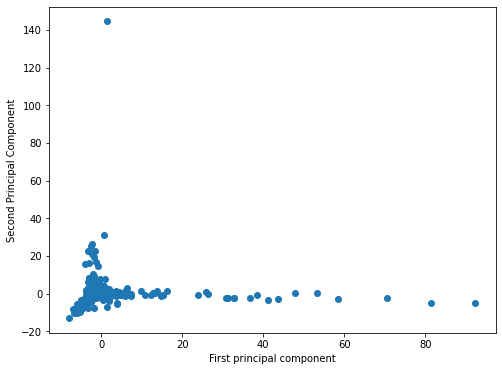

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(tf_idf_red[:,0],tf_idf_red[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### 3. Berdasarkan hasil yang sudah didapatkan pada nomor 1, lakukan pemprosesan menggunakan SVD (2 komponen). Anda dapat mencoba menggunakan TruncatedSVD pada library scikit-learn untuk menyelesaikannya.

In [42]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

svd = TruncatedSVD(n_components=2)
pres = svd.fit(df_vocabulary2)
pres
print(pres.singular_values_)

[245.59275912 201.00225693]


### 4.  Bagaimana hasil yang Anda dapatkan setelah menggunakan PCA dan SVD ? Apakah ada hal unik yang bisa Anda temukan ? Jelaskan analisis singkat Anda minimal 3 kalimat.


> Darihasil diatas terlihat bahwa nilai PCA 1 dan PCA 2 berdekatan. Analisis komponen utama (PCA) biasanya dijelaskan melalui dekomposisi eigen dari matriks kovarians. Sedangkan SVD  dilakukan melalui dekomposisi nilai singular dari data matriks . SVD  mendiagonalisasi matriks menjadi matriks khusus yang mudah dimanipulasi dan dianalisis.Oleh karena itu dapat menguraikan data menjadi komponen independen. PCA melewatkan komponen yang kurang signifikan sehingga dapat menggunakan SVD untuk menemukan PCA dengan memotong vektor basis yang kurang penting dalam matriks SVD asli.

# E - IR Model Evaluation

### a. Lakukan human judgment (proses manual dalam menilai apakah dokumen yang diperoleh merupakan dokumen yang relevan dengan query yang diberikan) pada 10 abstrak untuk masing-masing hasil retrieval menggunakan BM25 (bagian B) dan Word2Vec (bagian C). Berikan nilai 1 jika Anda anggap abstrak tersebut relevan dengan query awal dan 0 jika tidak. Menggunakan  query “information retrieval”

#### BM25
(urutan 1-10 untuk dari yang terbesar sampai terkecil)
\begin{matrix}
No & Nilai &\\
1 & 1\\
2 & 1\\
3 & 1\\
4 & 0\\
5 & 0\\
6 & 1\\
7 & 1\\
8 & 0\\
9 & 1\\
10 & 1
\end{matrix}

#### Word2Vec
(urutan 1-10 untuk dari yang terbesar sampai terkecil)
\begin{matrix}
No & Nilai &\\
1 & 1\\
2 & 1\\
3 & 0\\
4 & 0\\
5 & 0\\
6 & 0\\
7 & 0\\
8 & 1\\
9 & 0\\
10 & 1
\end{matrix}

### 2. Berdasarkan hasil dari nomor 1, hitung P@1 (precision-at-1), P@3, P@5, Mean Average Precision (MAP) dengan micro average, dan MAP dengan macro average dari hasil retrieval Anda untuk BM25 dan Word2Vec.

## BM25

\begin{matrix}
Nilai & 1 & 1 & 1 & 0 & 0\\
Recall & 1 & 1 & 1 & 0.8 & 0.6\\
Precision & 1 & 1 & 1 & 0.75 & 0.6\\
\end{matrix}

1. P@1 = 1/1 = 1  

2. P@3 = 2/2 = 1

3. P@5 = 3/5 = 0.6

## Word2Vec

\begin{matrix}
Nilai & 1 & 1 & 0 & 0 & 0 \\
Recall & 1 & 1  & 05 & 0.4 & 0.3& \\
Precision & 1 & 1 & 0.66667 & 0.5 & 0.4 \\
\end{matrix}

1. P@1 = 1/1 = 1  

2. P@3 = 2/3 = 0.66667

3. P@5 =3/5 = 0.6

### 3 Andaikan pada ground truth terdapat 5 item yang relevan dan berdasarkan hasil dari nomor 1, hitung R@1 (recall-at-1), R@3, R@5 dari hasil retrieval Anda untuk BM25 dan Word2Vec. Anda boleh melakukan ini secara manual maupun otomatis.

BM25
<p>R@1 = 1/1 = 0.2</p>
<p>R@3 = 3/5 = 0.6</p>
<p>R@5 = 3/5 = 0.6</p>

Word2Vec
<p>R@1 = 1/5 = 0.2</p>
<p>R@3 = 2/5 = 0.4</p>
<p>R@5 = 3/5 = 0.6</p>

### 4. Berdasarkan hasil dari nomor-nomor sebelumnya di bagian ini, lakukan analisis perbandingan mana yang lebih baik antara model BM25 atau Word2Vec. Sertakan penjelasan singkat dalam 3-5 kalimat terkait hasil yang didapatkan tersebut.

Menurut saya dari yang dihasilkan nomor sebelumnya terlihat bahwa BM25 lebih baik dibandingkan  Word2Vec. Hal itu karena bisa saja model word2vectornya tidak mampu menangkap kata dan membuat vectornya benar sehingga jika dilihat dari hasilnya terdapat beberapa yang tidak relevan dan tidak ada representasi bersama di tingkat sub-kata.